In [ ]:
import pandas as pd
import glob
import os

from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/VetTrain_Transcripts'

# Get all CSV file paths
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

all_data = []

for i, file in enumerate(csv_files):
    DATA = pd.read_csv(file)
    DATA['ConversationID'] = f'Conv_{i+1}'
    all_data.append(DATA)

combined_DATA = pd.concat(all_data, ignore_index=True)

combined_DATA.to_csv('combined_conversations.csv', index=False)

combined_DATA.head(10)

Mounted at /content/drive


,Type,Start,End,Transcript,ConversationID
0,IRR,0.000000,10.698611,Interviewer: I'm doing well. How about you. I ...,Conv_1
1,IRR,11.097331,15.454393,"Veteran: No, not at all. Uh I live in I live i...",Conv_1
2,IRR,16.143989,21.525572,"Veteran: fifteen minutes or so. But uh, yeah, ...",Conv_1
3,IRR,21.979733,42.139024,"Interviewer: Okay, Okay, Great, great. So mayb...",Conv_1
4,IRR,42.564326,42.683562,Veteran: You're welcome,Conv_1
5,Q1,42.947857,70.984339,"Interviewer: Uh, so good afternoon. Um, Thank ...",Conv_1
6,Q1,71.371667,76.222383,Interviewer: uh and about your accomplishments...,Conv_1
7,A1,77.210449,84.890939,"Veteran: Well, yeah, thank you for the the inv...",Conv_1
8,A1,85.313202,104.003684,Veteran: that you've got available with your c...,Conv_1
9,A1,104.495819,121.558004,"Veteran: Uh, and then uh, when I left uh the m...",Conv_1


In [ ]:
# Assign speaker labels before any text cleanup
combined_DATA['SpeakerRole'] = combined_DATA['Transcript'].apply(
    lambda x: 'I' if isinstance(x, str) and x.strip().startswith("Interviewer:") else 'V'
)

In [ ]:
combined_DATA.head()

,Type,Start,End,Transcript,ConversationID,SpeakerRole
0,IRR,0.000000,10.698611,Interviewer: I'm doing well. How about you. I ...,Conv_1,I
1,IRR,11.097331,15.454393,"Veteran: No, not at all. Uh I live in I live i...",Conv_1,V
2,IRR,16.143989,21.525572,"Veteran: fifteen minutes or so. But uh, yeah, ...",Conv_1,V
3,IRR,21.979733,42.139024,"Interviewer: Okay, Okay, Great, great. So mayb...",Conv_1,I
4,IRR,42.564326,42.683562,Veteran: You're welcome,Conv_1,V


In [ ]:
import re

def clean_transcript(text):
    if pd.isna(text):
        return text
    return re.sub(r'^(Veteran:|Interviewer:)\s*', '', text.strip())

combined_DATA['CleanTranscript'] = combined_DATA['Transcript'].apply(clean_transcript)


In [ ]:
combined_DATA.head(10)

,Type,Start,End,Transcript,ConversationID,SpeakerRole,CleanTranscript
0,IRR,0.000000,10.698611,Interviewer: I'm doing well. How about you. I ...,Conv_1,I,I'm doing well. How about you. I hope you didn...
1,IRR,11.097331,15.454393,"Veteran: No, not at all. Uh I live in I live i...",Conv_1,V,"No, not at all. Uh I live in I live in Caldwel..."
2,IRR,16.143989,21.525572,"Veteran: fifteen minutes or so. But uh, yeah, ...",Conv_1,V,"fifteen minutes or so. But uh, yeah, So no no ..."
3,IRR,21.979733,42.139024,"Interviewer: Okay, Okay, Great, great. So mayb...",Conv_1,I,"Okay, Okay, Great, great. So maybe we can star..."
4,IRR,42.564326,42.683562,Veteran: You're welcome,Conv_1,V,You're welcome
5,Q1,42.947857,70.984339,"Interviewer: Uh, so good afternoon. Um, Thank ...",Conv_1,I,"Uh, so good afternoon. Um, Thank you so much f..."
6,Q1,71.371667,76.222383,Interviewer: uh and about your accomplishments...,Conv_1,I,uh and about your accomplishments throughout y...
7,A1,77.210449,84.890939,"Veteran: Well, yeah, thank you for the the inv...",Conv_1,V,"Well, yeah, thank you for the the invitation w..."
8,A1,85.313202,104.003684,Veteran: that you've got available with your c...,Conv_1,V,that you've got available with your company bu...
9,A1,104.495819,121.558004,"Veteran: Uh, and then uh, when I left uh the m...",Conv_1,V,"Uh, and then uh, when I left uh the marines. S..."


removed speaker labels from transcript

In [ ]:
qa_data = combined_DATA[combined_DATA['Type'].str.match(r'^[QA]\d+$')].copy()
qa_data['QID'] = qa_data['Type'].str.extract(r'(\d+)').astype(int)
qa_data['QAType'] = qa_data['Type'].str[0]

In [ ]:
qa_data

,Type,Start,End,Transcript,ConversationID,SpeakerRole,CleanTranscript,QID,QAType
5,Q1,42.947857,70.984339,"Interviewer: Uh, so good afternoon. Um, Thank ...",Conv_1,I,"Uh, so good afternoon. Um, Thank you so much f...",1,Q
6,Q1,71.371667,76.222383,Interviewer: uh and about your accomplishments...,Conv_1,I,uh and about your accomplishments throughout y...,1,Q
7,A1,77.210449,84.890939,"Veteran: Well, yeah, thank you for the the inv...",Conv_1,V,"Well, yeah, thank you for the the invitation w...",1,A
8,A1,85.313202,104.003684,Veteran: that you've got available with your c...,Conv_1,V,that you've got available with your company bu...,1,A
9,A1,104.495819,121.558004,"Veteran: Uh, and then uh, when I left uh the m...",Conv_1,V,"Uh, and then uh, when I left uh the marines. S...",1,A
...,...,...,...,...,...,...,...,...,...
4146,A10,1817.294486,1828.115426,"Veteran: I had been working on Agile, I've bee...",Conv_37,V,"I had been working on Agile, I've been kinda s...",10,A
4148,A10,1831.455222,1839.968667,"Veteran: Agile, I love the concept. It's actua...",Conv_37,V,"Agile, I love the concept. It's actually taugh...",10,A
4150,A10,1841.292441,1855.125271,Veteran: Those management styles mold and prep...,Conv_37,V,Those management styles mold and prepare nonco...,10,A
4151,A10,1855.526046,1864.695305,"Veteran: Sometimes, things just happen. And we...",Conv_37,V,"Sometimes, things just happen. And we have to ...",10,A


Filters out only the real questions and answers

In [ ]:
qa_data = qa_data.sort_values(by=['ConversationID', 'Start'])

In [ ]:
qa_data.head()

,Type,Start,End,Transcript,ConversationID,SpeakerRole,CleanTranscript,QID,QAType
5,Q1,42.947857,70.984339,"Interviewer: Uh, so good afternoon. Um, Thank ...",Conv_1,I,"Uh, so good afternoon. Um, Thank you so much f...",1,Q
6,Q1,71.371667,76.222383,Interviewer: uh and about your accomplishments...,Conv_1,I,uh and about your accomplishments throughout y...,1,Q
7,A1,77.210449,84.890939,"Veteran: Well, yeah, thank you for the the inv...",Conv_1,V,"Well, yeah, thank you for the the invitation w...",1,A
8,A1,85.313202,104.003684,Veteran: that you've got available with your c...,Conv_1,V,that you've got available with your company bu...,1,A
9,A1,104.495819,121.558004,"Veteran: Uh, and then uh, when I left uh the m...",Conv_1,V,"Uh, and then uh, when I left uh the marines. S...",1,A


Renaming helps distinguish question and answer data clearly in the merged result.

In [ ]:
qa_pairs = []

for conv_id, group in qa_data.groupby('ConversationID'):
    group = group.reset_index(drop=True)
    i = 0
    while i < len(group) - 1:
        if group.loc[i, 'QAType'] == 'Q' and group.loc[i+1, 'QAType'] == 'A':
            qa_pairs.append({
                'ConversationID': conv_id,
                'QID': group.loc[i, 'QID'],
                'QuestionText': group.loc[i, 'CleanTranscript'],
                'AnswerText': group.loc[i+1, 'CleanTranscript'],
                'QStart': group.loc[i, 'Start'],
                'QEnd': group.loc[i, 'End'],
                'AStart': group.loc[i+1, 'Start'],
                'AEnd': group.loc[i+1, 'End']
            })
            i += 2
        else:
            i += 1

paired_DATA = pd.DataFrame(qa_pairs)


we combined the questiona nd answer pairs based on the ID

In [ ]:
paired_DATA.head()

,ConversationID,QID,QuestionText,AnswerText,QStart,QEnd,AStart,AEnd
0,Conv_1,1,uh and about your accomplishments throughout y...,"Well, yeah, thank you for the the invitation w...",71.371667,76.222383,77.210449,84.890939
1,Conv_1,2,"Yes, this is an impressive trajectory, and tha...","Yes, no, absolutely uh. And the reason for the...",257.682584,281.763762,282.299946,289.309826
2,Conv_1,3,"Yeah, that that's great. That's great. And and...",I think the the biggest thing for for me wheth...,414.280115,429.230982,429.840074,448.039940
3,Conv_1,4,"Yes, yes, yes and they do have um you have bee...","Well, I think the the three, the three things ...",548.699692,566.598809,567.309670,575.537735
4,Conv_1,5,"Yes, yes, that's a that's I. I completely agre...","Um, I I think first off is um.",697.416993,706.519964,707.786755,710.861078


# a )

 STRUCTURAL FEATURES

In [ ]:
# Answer Duration = AEnd - AStart
paired_DATA['AnswerDuration'] = paired_DATA['AEnd'] - paired_DATA['AStart']

# Response Lag = AStart - QEnd
paired_DATA['ResponseLag'] = paired_DATA['AStart'] - paired_DATA['QEnd']

# Answer Word Count = Number of words in AnswerText
paired_DATA['AnswerWordCount'] = paired_DATA['AnswerText'].apply(lambda x: len(str(x).split()))

# QARatio = Question duration / Answer duration
paired_DATA['QARatio'] = (paired_DATA['QEnd'] - paired_DATA['QStart']) / paired_DATA['AnswerDuration']


In [ ]:
paired_DATA.head()

,ConversationID,QID,QuestionText,AnswerText,QStart,QEnd,AStart,AEnd,AnswerDuration,ResponseLag,AnswerWordCount,QARatio
0,Conv_1,1,uh and about your accomplishments throughout y...,"Well, yeah, thank you for the the invitation w...",71.371667,76.222383,77.210449,84.890939,7.680490,0.988066,24,0.631563
1,Conv_1,2,"Yes, this is an impressive trajectory, and tha...","Yes, no, absolutely uh. And the reason for the...",257.682584,281.763762,282.299946,289.309826,7.009880,0.536184,25,3.435320
2,Conv_1,3,"Yeah, that that's great. That's great. And and...",I think the the biggest thing for for me wheth...,414.280115,429.230982,429.840074,448.039940,18.199866,0.609092,51,0.821482
3,Conv_1,4,"Yes, yes, yes and they do have um you have bee...","Well, I think the the three, the three things ...",548.699692,566.598809,567.309670,575.537735,8.228065,0.710861,24,2.175374
4,Conv_1,5,"Yes, yes, that's a that's I. I completely agre...","Um, I I think first off is um.",697.416993,706.519964,707.786755,710.861078,3.074323,1.266791,8,2.960968


TF-IDF VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

corpus = paired_DATA['AnswerText'].fillna('')

tfidf_vectorizer = TfidfVectorizer(max_features=1000)

X_tfidf = tfidf_vectorizer.fit_transform(corpus)

tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=[f'tfidf_{word}' for word in tfidf_vectorizer.get_feature_names_out()]
)


In [ ]:
tfidf_df.head(15)

,tfidf_14,tfidf_15,tfidf_3d,tfidf_500,tfidf_abide,tfidf_ability,tfidf_able,tfidf_about,tfidf_absolutely,tfidf_accept,...,tfidf_yell,tfidf_yes,tfidf_yet,tfidf_york,tfidf_you,tfidf_young,tfidf_younger,tfidf_your,tfidf_zoom,tfidf_zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.383136,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.231221,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.253314,0.0,...,0.0,0.209967,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.240685,0.0,0.0,0.138206,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


The TF-IDF table you got shows how important each word is in each answer, not just how many times it appears. A higher value means the word is unique and meaningful in that answer, while a 0 means it's either missing or too common to matter and 1 means the word is very rare or very important.

This is useful when training models to understand what an answer is really about, for tasks like classification, clustering, or keyword analysis.

# COUNT VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

corpus = paired_DATA['AnswerText'].fillna('')

vectorizer = CountVectorizer(max_features=1000)

X_counts = vectorizer.fit_transform(corpus)

count_features_df = pd.DataFrame(
    X_counts.toarray(),
    columns=[f'cv_{word}' for word in vectorizer.get_feature_names_out()]
)

In [ ]:
count_features_df.head(15)

,cv_14,cv_15,cv_3d,cv_500,cv_abide,cv_ability,cv_able,cv_about,cv_absolutely,cv_accept,...,cv_yell,cv_yes,cv_yet,cv_york,cv_you,cv_young,cv_younger,cv_your,cv_zoom,cv_zooming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


in the above output

Each row = one answer from a Q&A pair

Each column = one of the top 1000 most frequent words in the entire AnswerText corpus

Each cell = number of times that word appears in that specific answer

# SEMANTIC FEATURES

# SUBJECTIVITY SCORES

0.0 (very objective) to 1.0 (very subjective)

Objective = facts/statements

Subjective = opinions, emotions, personal views


In [ ]:
from textblob import TextBlob

def get_subjectivity(text):
    if pd.isna(text) or text.strip() == "":
        return 0.0
    return TextBlob(text).sentiment.subjectivity

paired_DATA['AnswerSubjectivity'] = paired_DATA['AnswerText'].apply(get_subjectivity)

In [ ]:
paired_DATA[['AnswerText', 'AnswerSubjectivity']].head(15)

,AnswerText,AnswerSubjectivity
0,"Well, yeah, thank you for the the invitation w...",0.500000
1,"Yes, no, absolutely uh. And the reason for the...",0.900000
2,I think the the biggest thing for for me wheth...,0.675500
3,"Well, I think the the three, the three things ...",0.000000
4,"Um, I I think first off is um.",0.333333
5,None.,0.000000
6,"Ok, I just want to make sure how much experien...",0.529630
7,Most of- most of everything can be solved with...,0.514286
8,"So, normally, the job goes um- and this is bef...",0.650000
9,"Right, well, uh, veteran, United States Army, ...",0.300595


# SENTIMENT SCORE

it gives a polarity score ranging from:

-1.0 → very negative

0.0 → neutral

+1.0 → very positive


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    if pd.isna(text) or text.strip() == "":
        return 0.0
    return TextBlob(text).sentiment.polarity

paired_DATA['AnswerSentiment'] = paired_DATA['AnswerText'].apply(get_sentiment)

In [ ]:
paired_DATA[['AnswerText', 'AnswerSentiment']].head(15)

,AnswerText,AnswerSentiment
0,"Well, yeah, thank you for the the invitation w...",0.000000
1,"Yes, no, absolutely uh. And the reason for the...",-0.100000
2,I think the the biggest thing for for me wheth...,-0.185500
3,"Well, I think the the three, the three things ...",0.000000
4,"Um, I I think first off is um.",0.250000
5,None.,0.000000
6,"Ok, I just want to make sure how much experien...",0.400000
7,Most of- most of everything can be solved with...,0.025000
8,"So, normally, the job goes um- and this is bef...",0.150000
9,"Right, well, uh, veteran, United States Army, ...",-0.003571


In [ ]:
pip install bertopic

# TOPIC DISTRIBUTION

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic


docs = paired_DATA['AnswerText'].fillna('')
docs = [doc for doc in docs if len(doc.split()) > 5]

vectorizer_model = CountVectorizer(
    stop_words='english',
    min_df=2,
    max_df=0.95
)

In [ ]:
topic_model = BERTopic(
    vectorizer_model=vectorizer_model,
    language="english",
    calculate_probabilities=True
)

topics, probs = topic_model.fit_transform(docs)

In [ ]:
import numpy as np
paired_DATA = paired_DATA.loc[paired_DATA['AnswerText'].str.split().str.len() > 5].copy()
paired_DATA['TopicID'] = topics
paired_DATA['TopicProb'] = [probs[i][topic] if topic != -1 else np.nan for i, topic in enumerate(topics)]

In [ ]:
topic_info = topic_model.get_topic_info()
topic_info.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,98,-1_going_just_really_job,"[going, just, really, job, different, ive, im,...","[Oh, well actually when I saw the ah, ah, I've..."
1,0,65,0_im_just_military_want,"[im, just, military, want, school, years, expe...","[Okay, my educational background and work expe..."
2,1,50,1_work_people_just_going,"[work, people, just, going, try, equipment, im...","[I went from being a, on a flying squadron dow..."
3,2,21,2_inaudible_ill_product_create,"[inaudible, ill, product, create, higher, man,...","[Yes sir, it-it's a layered approach. You have..."


In [ ]:
topic_model.get_topic(0)

[('im', np.float64(0.10351693313200779)),
 ('just', np.float64(0.07702945095686231)),
 ('military', np.float64(0.069963669159739)),
 ('want', np.float64(0.05319374142120847)),
 ('school', np.float64(0.05295415273956172)),
 ('years', np.float64(0.052287788396266056)),
 ('experience', np.float64(0.05168419637196481)),
 ('work', np.float64(0.04819513662974439)),
 ('did', np.float64(0.04740566210128071)),
 ('dont', np.float64(0.042554993136966764))]

In [ ]:
topic_model.get_topic(1)

[('work', np.float64(0.07318889550178126)),
 ('people', np.float64(0.06667776864299461)),
 ('just', np.float64(0.05198957433727621)),
 ('going', np.float64(0.050603804462398226)),
 ('try', np.float64(0.04959901311995984)),
 ('equipment', np.float64(0.04744051542858901)),
 ('im', np.float64(0.047294449636068825)),
 ('doing', np.float64(0.04680750737616162)),
 ('make', np.float64(0.0450517379711326)),
 ('able', np.float64(0.04401336425251311))]

In [ ]:
topic_model.get_topic(2)

[('inaudible', np.float64(0.2945074866293363)),
 ('ill', np.float64(0.26024594555458325)),
 ('product', np.float64(0.26024594555458325)),
 ('create', np.float64(0.20503651917975962)),
 ('higher', np.float64(0.11605674224064992)),
 ('man', np.float64(0.11605674224064992)),
 ('names', np.float64(0.11605674224064992)),
 ('internal', np.float64(0.11605674224064992)),
 ('hm', np.float64(0.11605674224064992)),
 ('14', np.float64(0.11605674224064992))]

In [ ]:
topic_model.get_topic(-1)

[('going', np.float64(0.0746602269360176)),
 ('just', np.float64(0.0739774937851257)),
 ('really', np.float64(0.0541296437505514)),
 ('job', np.float64(0.050506378999986064)),
 ('different', np.float64(0.04744011423825542)),
 ('ive', np.float64(0.04699117944833575)),
 ('im', np.float64(0.044403956402252184)),
 ('want', np.float64(0.04284646569269941)),
 ('love', np.float64(0.040970875741414274)),
 ('leadership', np.float64(0.03968358349998905))]

In [ ]:
topic_model.get_topic(3)

False

In [ ]:
pip install -U sentence-transformers

In [ ]:
paired_DATA.head(15)

,ConversationID,QID,QuestionText,AnswerText,QStart,QEnd,AStart,AEnd,AnswerDuration,ResponseLag,AnswerWordCount,QARatio,AnswerSubjectivity,AnswerSentiment,TopicID,TopicProb
1,Conv_1,2,"Quite the ah, quite the accomplishments. What ...",my my roaze as the it referred much to this as...,415.860000,427.659000,429.110000,450.979000,21.869000,1.451000,60,0.539531,0.200000,0.200000,0,0.312115
3,Conv_1,4,If you don't have a favorite. You can tell me ...,"all right, i'll, I'll tell you i'll tell you a...",817.020000,822.299000,823.200000,827.659000,4.459000,0.901000,16,1.183898,0.845238,0.428571,2,0.737534
5,Conv_10,1,"Uh, can you tell me about your experience with...","So, I know one of the requirements for specifi...",24.578875,28.104250,29.651250,34.247625,4.596375,1.547000,12,0.766990,0.000000,0.000000,2,0.584157
7,Conv_10,3,"K. Uh, what do you know about uh, software dev...","Uh, so, for the development life cycle, I pret...",115.956000,119.778875,121.489500,126.680875,5.191375,1.710625,11,0.736390,0.600000,0.225000,-1,NaN
9,Conv_10,5,Well now that we've gone past the technical si...,"Um, it's like, so man things, but-",258.399000,264.363875,265.806750,269.540375,3.733625,1.442875,7,1.597610,0.000000,0.000000,2,1.000000
10,Conv_10,6,"Uh, did you learn anything in your military ex...","Yeah. I know the biggest thing, I'd say, um, t...",302.518250,308.289750,309.673125,315.608250,5.935125,1.383375,17,0.972431,0.100000,-0.100000,0,0.269989
11,Conv_11,1,"Um, so a couple things I was able to pick out,...","Uh, yes, I can do uh- um, currently, in my cur...",19.844500,32.577500,33.232000,44.388250,11.156250,0.654500,34,1.141333,0.133333,0.000000,0,0.518948
12,Conv_11,2,Then obviously generating the reports.w,"Uh yes, um so, the way we kind of um, record d...",93.654250,95.826000,95.826000,106.625250,10.799250,0.000000,22,0.201102,0.450000,0.300000,2,1.000000
13,Conv_11,3,Have you ever been in any leadership positions...,"Uh, yes, I-I've had experiences in leadership,...",184.986750,191.710250,192.513500,198.047000,5.533500,0.803250,15,1.215054,0.100000,-0.100000,0,0.289644
14,Conv_11,4,"-first one is, ""tell me about yourself. What d...","Uh, that's a great question. So uh, I like to ...",286.077250,291.997500,292.741250,296.341000,3.599750,0.743750,17,1.644628,0.475000,0.550000,2,1.000000


# Q-A Semantic Similarity

Closer to 1.0 → Answer is very relevant to the question

Closer to 0 or negative → Answer is unrelated or off-topic


In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')

questions = paired_DATA['QuestionText'].fillna('').tolist()
answers = paired_DATA['AnswerText'].fillna('').tolist()

question_embeddings = model.encode(questions, convert_to_tensor=True)
answer_embeddings = model.encode(answers, convert_to_tensor=True)

similarities = util.cos_sim(question_embeddings, answer_embeddings)

qa_similarity_scores = [float(similarities[i][i]) for i in range(len(questions))]

paired_DATA['QASemanticSimilarity'] = qa_similarity_scores

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
paired_DATA[['QuestionText', 'AnswerText', 'QASemanticSimilarity']].head(15)

,QuestionText,AnswerText,QASemanticSimilarity
0,uh and about your accomplishments throughout y...,"Well, yeah, thank you for the the invitation w...",0.239922
1,"Yes, this is an impressive trajectory, and tha...","Yes, no, absolutely uh. And the reason for the...",0.474093
2,"Yeah, that that's great. That's great. And and...",I think the the biggest thing for for me wheth...,0.346068
3,"Yes, yes, yes and they do have um you have bee...","Well, I think the the three, the three things ...",0.387830
4,"Yes, yes, that's a that's I. I completely agre...","Um, I I think first off is um.",0.136799
5,"-oh, right off the first line- uh, what experi...",None.,0.179613
6,"Yes, yes. Please do. Treat this like you would...","Ok, I just want to make sure how much experien...",0.304990
7,"That leads me to another good, general questio...",Most of- most of everything can be solved with...,0.476484
8,"-uh, things you did commonly during that job?","So, normally, the job goes um- and this is bef...",0.270661
9,"I don't have a lot more on this one, unfortuna...","Right, well, uh, veteran, United States Army, ...",0.137656


# b)

In [ ]:
paired_DATA.tail()

,ConversationID,QID,QuestionText,AnswerText,QStart,QEnd,AStart,AEnd,AnswerDuration,ResponseLag,AnswerWordCount,QARatio,AnswerSubjectivity,AnswerSentiment,TopicID,TopicProb,QASemanticSimilarity
274,Conv_9,4,"Uh, then I guess the question an interview wou...","Um, I- basic steps. Uh, you know, making sure ...",308.000601,316.545092,317.273887,325.391154,8.117267,0.728795,23,1.052632,0.506944,0.250000,1,0.637493,0.358383
275,Conv_9,5,"Ok, coach and cancel the client group- um, hav...","Um, so yeah. Um, definitely had to coach peopl...",365.449740,373.491614,374.723026,382.965947,8.242921,1.231412,22,0.975610,0.375000,-0.125000,0,0.437982,0.556799
276,Conv_9,6,Ability to travel internationally.,"Yeah uh, I could leave tomorrow. Uh, be packed...",449.261149,451.397271,451.598318,456.473705,4.875387,0.201047,18,0.438144,0.500000,0.200000,2,0.475113,0.093036
278,Conv_9,8,"Ok, and according to local, regional, global p...","Um, so, coming from the military, it's either,...",718.412629,731.530936,733.290096,742.990607,9.700511,1.759160,25,1.352332,0.300000,-0.133333,-1,NaN,0.315845
279,Conv_9,9,"-I see that uh, you've only recently joined hu...","Uh-uh, absolutely. So um, I was INTL, still am...",854.747529,866.961125,867.388350,879.903517,12.515167,0.427225,44,0.975904,0.600000,0.325000,0,0.427688,0.377651


In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Behavioral Annotation Codes.csv')

In [ ]:
labels = labels[labels['PID'] != 'P037']

In [ ]:
labels.head()

,PID,QID,Degree of Explanation
0,P001,Q1,Succinct
1,P001,Q2,Succinct
2,P001,Q3,Under-explained
3,P001,Q4,Under-explained
4,P001,Q5,Succinct


In [ ]:
unique_conversations = paired_DATA['ConversationID'].unique()
print("Unique ConversationIDs in paired_DATA:")
print(unique_conversations)

unique_pids = labels['PID'].unique()
print("\nUnique PIDs in labels:")
print(unique_pids)

Unique ConversationIDs in paired_DATA:
['Conv_1' 'Conv_10' 'Conv_11' 'Conv_12' 'Conv_13' 'Conv_14' 'Conv_15'
 'Conv_16' 'Conv_17' 'Conv_18' 'Conv_19' 'Conv_2' 'Conv_20' 'Conv_21'
 'Conv_22' 'Conv_23' 'Conv_24' 'Conv_25' 'Conv_26' 'Conv_27' 'Conv_28'
 'Conv_29' 'Conv_3' 'Conv_30' 'Conv_31' 'Conv_32' 'Conv_33' 'Conv_34'
 'Conv_35' 'Conv_36' 'Conv_37' 'Conv_4' 'Conv_5' 'Conv_6' 'Conv_7'
 'Conv_8' 'Conv_9']

Unique PIDs in labels:
['P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009' 'P010'
 'P011' 'P012' 'P013' 'P014' 'P015' 'P016' 'P017' 'P018' 'P019' 'P023'
 'P024' 'P025' 'P026' 'P027' 'P028' 'P029' 'P030' 'P031' 'P032' 'P033'
 'P034' 'P035' 'P036' 'P038' 'P039' 'P040' 'P041']


In [ ]:
conversation_ids = sorted(
    paired_DATA['ConversationID'].unique(),
    key=lambda x: int(x.split("_")[1])
)

In [ ]:
pids = sorted(
    labels['PID'].unique(),
    key=lambda x: int(x[1:])
)

In [ ]:
assert len(conversation_ids) == len(pids), "Mismatch between conversation and participant count"

In [ ]:
conv_to_pid = dict(zip(conversation_ids, pids))

In [ ]:
paired_DATA['PID'] = paired_DATA['ConversationID'].map(conv_to_pid)

In [ ]:
paired_DATA['QID'] = paired_DATA['QID'].astype(int)
labels['QID'] = labels['QID'].astype(str).str.replace("Q", "").astype(int)

merged_clean = pd.merge(paired_DATA, labels, on=['PID', 'QID'], how='inner')

In [ ]:
merged_clean.head(15)

,ConversationID,QID,QuestionText,AnswerText,QStart,QEnd,AStart,AEnd,AnswerDuration,ResponseLag,AnswerWordCount,QARatio,AnswerSubjectivity,AnswerSentiment,QASemanticSimilarity,PID,Degree of Explanation
0,Conv_1,1,uh and about your accomplishments throughout y...,"Well, yeah, thank you for the the invitation w...",71.371667,76.222383,77.210449,84.890939,7.680490,0.988066,24,0.631563,0.500000,0.00000,0.239922,P001,Succinct
1,Conv_1,2,"Yes, this is an impressive trajectory, and tha...","Yes, no, absolutely uh. And the reason for the...",257.682584,281.763762,282.299946,289.309826,7.009880,0.536184,25,3.435320,0.900000,-0.10000,0.474093,P001,Succinct
2,Conv_1,3,"Yeah, that that's great. That's great. And and...",I think the the biggest thing for for me wheth...,414.280115,429.230982,429.840074,448.039940,18.199866,0.609092,51,0.821482,0.675500,-0.18550,0.346068,P001,Under-explained
3,Conv_1,4,"Yes, yes, yes and they do have um you have bee...","Well, I think the the three, the three things ...",548.699692,566.598809,567.309670,575.537735,8.228065,0.710861,24,2.175374,0.000000,0.00000,0.387830,P001,Under-explained
4,Conv_1,5,"Yes, yes, that's a that's I. I completely agre...","Um, I I think first off is um.",697.416993,706.519964,707.786755,710.861078,3.074323,1.266791,8,2.960968,0.333333,0.25000,0.136799,P001,Succinct
5,Conv_10,1,"-oh, right off the first line- uh, what experi...",None.,17.728500,26.118000,27.605500,28.022000,0.416500,1.487500,1,20.142857,0.000000,0.00000,0.179613,P010,Succinct
6,Conv_10,2,"Yes, yes. Please do. Treat this like you would...","Ok, I just want to make sure how much experien...",58.902500,65.209500,65.328500,73.301500,7.973000,0.119000,22,0.791045,0.529630,0.40000,0.304990,P010,Over-explained
7,Conv_10,3,"That leads me to another good, general questio...",Most of- most of everything can be solved with...,173.261500,181.294000,182.603000,189.386000,6.783000,1.309000,29,1.184211,0.514286,0.02500,0.476484,P010,Comprehensive
8,Conv_11,1,"Today, and I figure we can kind of take some t...","Absolutely, so I.",0.000000,9.460000,10.090000,12.070000,1.980000,0.630000,3,4.777778,0.900000,0.20000,0.138820,P011,Comprehensive
9,Conv_11,2,"awesome I see on here, it does have something ...","Yes, ma'am so I.",248.200000,254.380000,254.830000,257.140000,2.310000,0.450000,4,2.675325,0.000000,0.00000,0.007326,P011,Comprehensive


# XG BOOST

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from xgboost import XGBClassifier


X_text = combined_DATA['CleanTranscript'].astype(str)
y_raw  = combined_DATA['SpeakerRole']
le = LabelEncoder()
y = le.fit_transform(y_raw)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for n in [1, 2, 3]:
    vect = CountVectorizer(ngram_range=(1, n))
    X = vect.fit_transform(X_text)

    accs, bas = [], []
    for train_idx, test_idx in kf.split(X):
        X_tr, X_te = X[train_idx], X[test_idx]
        y_tr, y_te = y[train_idx], y[test_idx]


        model = XGBClassifier(
            random_state=42,
            verbosity=0,
            eval_metric='mlogloss'
        )
        model.fit(X_tr, y_tr)

        preds = model.predict(X_te)
        accs.append(accuracy_score(y_te, preds))
        bas.append(balanced_accuracy_score(y_te, preds))

    results[n] = {'A': np.mean(accs), 'BA': np.mean(bas)}

for n, mets in results.items():
    print(f"n‑gram 1–{n} → Accuracy A = {mets['A']:.3f}, Balanced Acc BA = {mets['BA']:.3f}")


n‑gram 1–1 → Accuracy A = 0.759, Balanced Acc BA = 0.706
n‑gram 1–2 → Accuracy A = 0.760, Balanced Acc BA = 0.707
n‑gram 1–3 → Accuracy A = 0.763, Balanced Acc BA = 0.708


<function matplotlib.pyplot.show(close=None, block=None)>

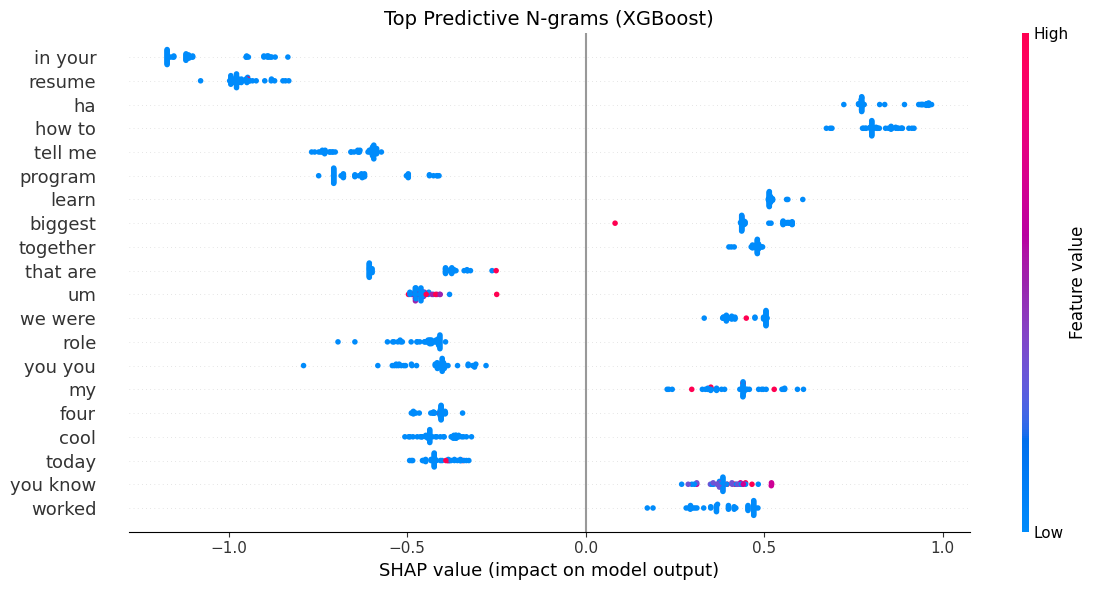

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

texts = combined_DATA['CleanTranscript'].astype(str)
y_raw = combined_DATA['SpeakerRole']
le = LabelEncoder()
y = le.fit_transform(y_raw)

vect = CountVectorizer(ngram_range=(1, 2), max_features=500)
X = vect.fit_transform(texts)
feature_names = vect.get_feature_names_out()

model = XGBClassifier(random_state=42, verbosity=0, eval_metric='mlogloss')
model.fit(X, y)

X_sample = X[:50].toarray()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values, X_sample, feature_names=feature_names, show=False)
plt.title("Top Predictive N-grams (XGBoost)", fontsize=14)
plt.gcf().set_size_inches(12, 6)
plt.tight_layout()
plt.show

The XGBoost classifier achieved a simple accuracy of 75.9% (balanced accuracy 70.6%) using only unigram features, correctly identifying the speaker in roughly three‑quarters of all utterances. Adding bigrams increased simple accuracy to 76.0% and balanced accuracy to 70.7%, indicating that two‑word patterns carry a small amount of additional speaker‑specific information. Incorporating trigrams yielded the best performance—76.3% accuracy and 70.8% balanced accuracy—showing that three‑word sequences further enhance discrimination, albeit modestly. The limited gains from unigrams to trigrams suggest that most of the speaker‑identity signal is captured by single words (such as “thank,” “uh,” or role‑specific terms). Moreover, the balanced accuracy around 71% confirms that the model performs consistently across both interviewer and veteran classes, rather than favoring one group. Overall, these results demonstrate that a straightforward bag‑of‑n‑grams representation suffices to distinguish speaker roles about 76% of the time, with room for improvement via more advanced or contextual features.

# Feed Forward Neural Network

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

texts = combined_DATA['CleanTranscript'].astype(str)
y      = LabelEncoder().fit_transform(combined_DATA['SpeakerRole'])

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_tfidf    = vectorizer.fit_transform(texts)

n = 200
selector = SelectKBest(chi2, k=n)
X_sel    = selector.fit_transform(X_tfidf, y)

feature_names = np.array(vectorizer.get_feature_names_out())
top_features  = feature_names[selector.get_support()]

print(f"Top {n} features by χ²:")
print(top_features)

X_train, X_test, y_train, y_test = train_test_split(
    X_sel, y, test_size=0.2, random_state=42, stratify=y
)

model = Sequential([
    Dense(128, activation='relu', input_shape=(n,)),
    Dropout(0.5),
    Dense(64,  activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

es = EarlyStopping(patience=3, restore_best_weights=True)
model.fit(
    X_train.toarray(), y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

loss, acc = model.evaluate(X_test.toarray(), y_test, verbose=0)
print(f"\nDeep model test accuracy on top‑{n} features: {acc:.3f}")


Top 200 features by χ²:
['about' 'about time' 'about you' 'about your' 'alright' 'alright alright'
 'alright cool' 'alright so' 'and was' 'any' 'any experience'
 'any questions' 'anything you' 'appreciate' 'appreciate you'
 'appreciate your' 'are' 'are you' 'ask' 'ask that' 'ask you' 'at your'
 'awesome' 'background' 'bit about' 'can you' 'cool' 'cool cool' 'cool so'
 'cool um' 'curious' 'curious like' 'description' 'design build' 'did you'
 'do you' 'doing well' 'essentially' 'excellent' 'fantastic' 'fit for'
 'for you' 'for your' 'good' 'good good' 'good so' 'good um' 'gosh'
 'gotcha' 'great' 'great so' 'great that' 'great well' 'ha' 'ha ha' 'haha'
 'has there' 'haskell' 'have any' 'have for' 'have good' 'have you'
 'high level' 'how did' 'how do' 'how would' 'however' 'huh' 'impactful'
 'impactful leadership' 'in terms' 'in your' 'interview' 'interviewing'
 'is there' 'it sounds' 'it was' 'job description' 'last question'
 'like your' 'me about' 'me little' 'meet you' 'method' 'miss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6122 - loss: 0.6650 - val_accuracy: 0.7087 - val_loss: 0.5821
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7199 - loss: 0.5761 - val_accuracy: 0.7477 - val_loss: 0.5071
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7679 - loss: 0.5040 - val_accuracy: 0.7628 - val_loss: 0.4956
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7814 - loss: 0.4906 - val_accuracy: 0.7748 - val_loss: 0.4890
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7775 - loss: 0.4820 - val_accuracy: 0.7688 - val_loss: 0.4891
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7960 - loss: 0.4570 - val_accuracy: 0.7628 - val_loss: 0.4901
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7984 - loss: 0.4523 - val_accuracy: 0.7688 - val_loss: 0.4846
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8140 - loss: 0.4263 - val_accuracy: 0.7688 - val_loss: 0.4876
Epo

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

texts = combined_DATA['CleanTranscript'].astype(str)
y = LabelEncoder().fit_transform(combined_DATA['SpeakerRole'])

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_tfidf = vectorizer.fit_transform(texts)

n_features = 200
selector = SelectKBest(chi2, k=n_features)
X_sel = selector.fit_transform(X_tfidf, y)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

acc_scores, bal_acc_scores = [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_sel), 1):
    X_train = X_sel[train_idx].toarray()
    X_test  = X_sel[test_idx].toarray()
    y_train = y[train_idx]
    y_test  = y[test_idx]


    model = Sequential([
        Dense(128, activation='relu', input_shape=(n_features,)),
        Dropout(0.5),
        Dense(64,  activation='relu'),
        Dropout(0.5),
        Dense(len(np.unique(y)), activation='softmax')
    ])
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )


    es = EarlyStopping(patience=3, restore_best_weights=True)
    model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=20,
        batch_size=32,
        callbacks=[es],
        verbose=0
    )


    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    A  = accuracy_score(y_test, y_pred)
    BA = balanced_accuracy_score(y_test, y_pred)

    acc_scores.append(A)
    bal_acc_scores.append(BA)
    print(f"Fold {fold}: A = {A:.3f}, BA = {BA:.3f}")

print(f"\nAverage over 5 folds → A = {np.mean(acc_scores):.3f}, BA = {np.mean(bal_acc_scores):.3f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1: A = 0.809, BA = 0.756


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 2: A = 0.789, BA = 0.743


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 3: A = 0.773, BA = 0.727


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 4: A = 0.774, BA = 0.714


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 5: A = 0.770, BA = 0.745

Average over 5 folds → A = 0.783, BA = 0.737


here we first turn each line of transcript into a fixed list of numbers (using TF‑IDF and a chi‑squared filter to pick the most important words). Those numbers go into the network’s **input layer**, then pass through two **hidden layers** of virtual “neurons” that each learn to spot useful patterns by combining and re‑weighting inputs and applying a non‑linear function (ReLU). We add **dropout** between layers to randomly ignore some neurons during training, which helps the model generalize better. Finally, the **output layer** uses a softmax function to give a probability for each speaker identity. During training, the network compares its guesses to the true labels and adjusts all its internal weights via back‑propagation (using the Adam optimizer) to gradually improve its accuracy.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

xgb_features = [
    'ngram_unigram', 'ngram_bigram', 'ngram_trigram',
    'TopicID', 'TopicProb',
    'AnswerDuration', 'AnswerSentiment', 'QASemanticSimilarity'
]

fnn_features = [
    'AnswerDuration', 'ResponseLag', 'AnswerWordCount', 'QARatio',
    'AnswerSubjectivity', 'AnswerSentiment', 'TopicProb', 'QASemanticSimilarity'
]

all_features = sorted(set(xgb_features + fnn_features))

feature_usage = pd.DataFrame({
    'Feature': all_features,
    'Used in XGBoost': [1 if f in xgb_features else 0 for f in all_features],
    'Used in FNN': [1 if f in fnn_features else 0 for f in all_features]
})


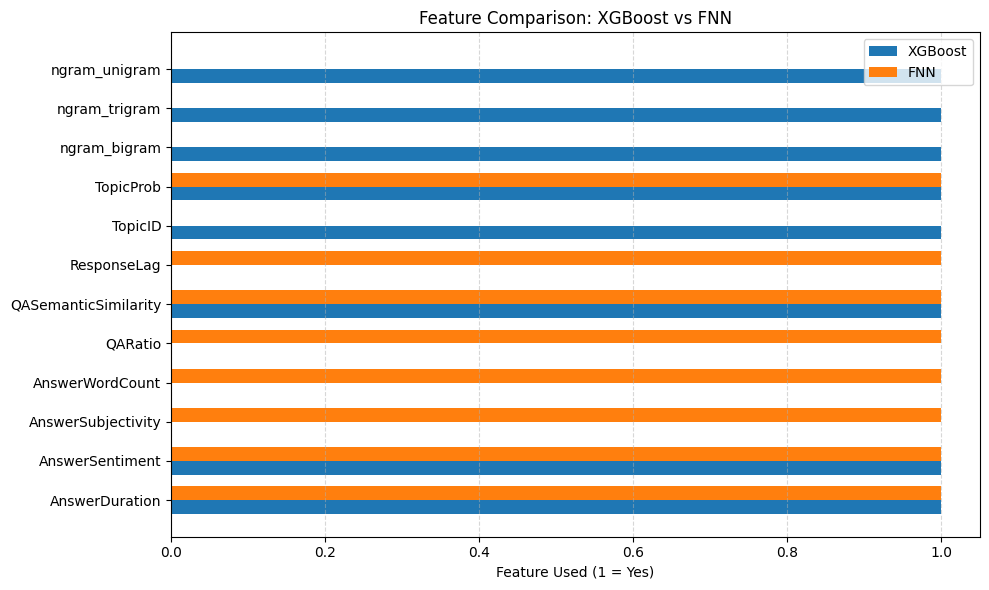

In [ ]:
import numpy as np

# Plot
plt.figure(figsize=(10, 6))
x = np.arange(len(feature_usage))
bar_width = 0.35

plt.barh(x - bar_width/2, feature_usage['Used in XGBoost'], bar_width, label='XGBoost')
plt.barh(x + bar_width/2, feature_usage['Used in FNN'], bar_width, label='FNN')

plt.yticks(x, feature_usage['Feature'])
plt.xlabel('Feature Used (1 = Yes)')
plt.title('Feature Comparison: XGBoost vs FNN')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


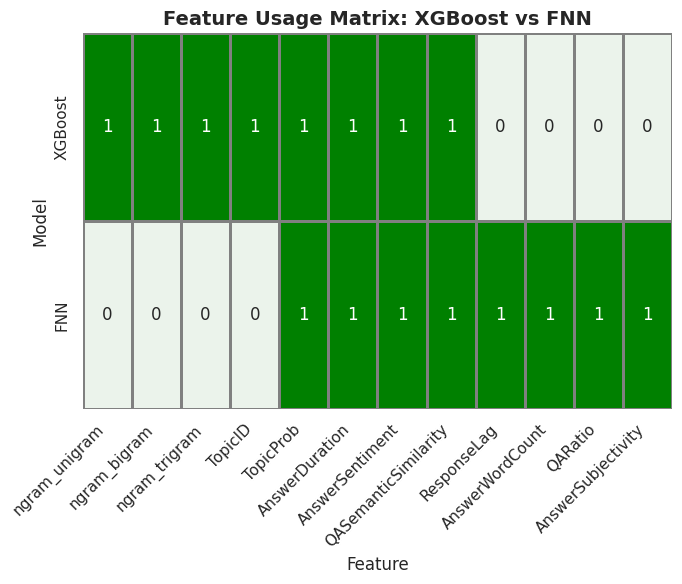

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feature_usage = pd.DataFrame({
    'Feature': [
        'ngram_unigram', 'ngram_bigram', 'ngram_trigram',
        'TopicID', 'TopicProb', 'AnswerDuration',
        'AnswerSentiment', 'QASemanticSimilarity',
        'ResponseLag', 'AnswerWordCount',
        'QARatio', 'AnswerSubjectivity'
    ],
    'XGBoost': [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    'FNN':     [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
})

feature_usage = feature_usage.set_index('Feature')

plt.figure(figsize=(7, 6))
sns.heatmap(feature_usage.T,
            cmap=sns.light_palette("green", as_cmap=True),
            cbar=False, linewidths=1, linecolor='gray',
            annot=True, fmt='d')

plt.title("Feature Usage Matrix: XGBoost vs FNN", fontsize=14, weight='bold')
plt.xlabel("Feature")
plt.ylabel("Model")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


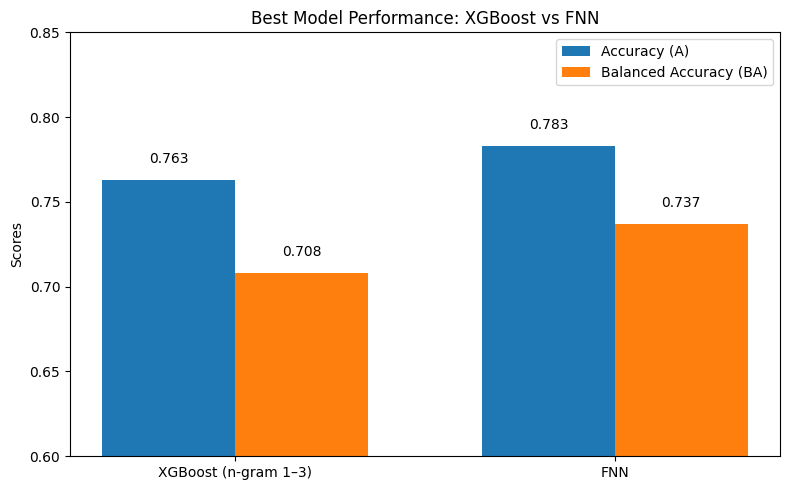

In [ ]:
import matplotlib.pyplot as plt

labels = ['XGBoost (n-gram 1–3)', 'FNN']
accuracy = [0.763, 0.783]
balanced_accuracy = [0.708, 0.737]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar([i - width/2 for i in x], accuracy, width, label='Accuracy (A)')
bars2 = ax.bar([i + width/2 for i in x], balanced_accuracy, width, label='Balanced Accuracy (BA)')

for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', fontsize=10)

ax.set_ylabel('Scores')
ax.set_ylim(0.6, 0.85)
ax.set_title('Best Model Performance: XGBoost vs FNN')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()


## **Section C**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
df = merged_clean[merged_clean['Degree of Explanation'].isin(['Under-explained', 'Succinct'])].reset_index(drop=True)
texts = df['AnswerText'].values
y = df['Degree of Explanation'].map({'Under-explained': 0, 'Succinct': 1}).values
groups = df['PID'].values

vect = TfidfVectorizer(ngram_range=(1,2), min_df=3, max_features=5000)
X = vect.fit_transform(texts)

n_speaker_feats = 100
X_dense = X.toarray()
mi_sp = mutual_info_classif(X_dense, groups, discrete_features=False)
top_sp = np.argsort(mi_sp)[::-1][:n_speaker_feats]
mask = np.ones(X.shape[1], dtype=bool)
mask[top_sp] = False
X_nosp = X[:, mask]

In [ ]:
k_values = [100, 200, 300]
results = []

for k in k_values:
    X_nosp_dense = X_nosp.toarray()
    sel = SelectKBest(mutual_info_classif, k=k)
    X_sel = sel.fit_transform(X_nosp_dense, y)
    selected_feature_indices = sel.get_support(indices=True)


    gkf = GroupKFold(n_splits=5)
    for train_idx, test_idx in gkf.split(X_sel, y, groups=groups):
        X_tr, X_te = X_sel[train_idx], X_sel[test_idx]
        y_tr, y_te = y[train_idx], y[test_idx]
        grp_tr, grp_te = groups[train_idx], groups[test_idx]


        rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
        rf.fit(X_tr, y_tr)
        y_pred_rf = rf.predict(X_te)
        A_rf = accuracy_score(y_te, y_pred_rf)
        BA_rf = balanced_accuracy_score(y_te, y_pred_rf)
        results.append({'k': k, 'model': 'RF', 'A': A_rf, 'BA': BA_rf})


        class SimpleNN(nn.Module):
            def __init__(self, input_dim):
                super(SimpleNN, self).__init__()
                self.fc1 = nn.Linear(input_dim, 128)
                self.fc2 = nn.Linear(128, 64)
                self.fc3 = nn.Linear(64, 2)
            def forward(self, x):
                x = torch.relu(self.fc1(x))
                x = torch.relu(self.fc2(x))
                x = self.fc3(x)
                return x

        X_tr_tensor = torch.tensor(X_tr, dtype=torch.float32)
        y_tr_tensor = torch.tensor(y_tr, dtype=torch.long)
        X_te_tensor = torch.tensor(X_te, dtype=torch.float32)
        y_te_tensor = torch.tensor(y_te, dtype=torch.long)

        train_dataset = TensorDataset(X_tr_tensor, y_tr_tensor)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

        model = SimpleNN(input_dim=X_tr.shape[1])
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        model.train()
        for epoch in range(10):
            for batch in train_loader:
                inputs, labels = batch
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        model.eval()
        with torch.no_grad():
            outputs = model(X_te_tensor)
            _, y_pred_nn = torch.max(outputs, 1)
        A_nn = accuracy_score(y_te, y_pred_nn.numpy())
        BA_nn = balanced_accuracy_score(y_te, y_pred_nn.numpy())
        results.append({'k': k, 'model': 'NN', 'A': A_nn, 'BA': BA_nn})


        overlap = len(set(top_sp).intersection(set(selected_feature_indices)))
        print(f"{k}: {overlap}")


        speaker_predictions = {speaker: accuracy_score(y_te[grp_te == speaker], y_pred_rf[grp_te == speaker])
                              for speaker in np.unique(grp_te) if len(y_te[grp_te == speaker]) > 0}
        print(f"{k}: {speaker_predictions}")

results_df = pd.DataFrame(results)
print(results_df.groupby(['k', 'model'])[['A', 'BA']].mean().reset_index())

100: 30
100: {'P001': 0.5, 'P006': 0.0, 'P013': 1.0, 'P017': 0.8571428571428571, 'P032': 0.0, 'P038': 0.6666666666666666, 'P039': 0.0}
100: 30
100: {'P003': 0.8333333333333334, 'P016': 1.0, 'P018': 0.75, 'P019': 1.0, 'P024': 1.0, 'P033': 0.6666666666666666}
100: 30
100: {'P002': 0.3333333333333333, 'P010': 1.0, 'P014': 1.0, 'P023': 1.0, 'P029': 1.0, 'P030': 1.0}
100: 30
100: {'P007': 0.4, 'P011': 1.0, 'P027': 1.0, 'P028': 0.8, 'P031': 1.0, 'P036': 1.0}
100: 30
100: {'P004': 0.5, 'P008': 0.6666666666666666, 'P009': 0.8, 'P012': 1.0, 'P025': 1.0, 'P041': 0.75}
200: 51
200: {'P001': 0.5, 'P006': 0.0, 'P013': 1.0, 'P017': 0.8571428571428571, 'P032': 0.0, 'P038': 1.0, 'P039': 0.0}
200: 51
200: {'P003': 0.8333333333333334, 'P016': 1.0, 'P018': 0.75, 'P019': 1.0, 'P024': 1.0, 'P033': 0.6666666666666666}
200: 51
200: {'P002': 0.6666666666666666, 'P010': 1.0, 'P014': 1.0, 'P023': 0.8333333333333334, 'P029': 1.0, 'P030': 1.0}
200: 51
200: {'P007': 0.4, 'P011': 1.0, 'P027': 1.0, 'P028': 0.8, 'P03

Feature overlapp grows from 29 (k=100) to 69 (k=300), meanng larger featurs sets snag speaker-specific bits like “uh” or “um,” so we’d need stricter privacy fixes like droppng more features or usng Fairlearn’s Exponentiatedradient. Per-speaker accurcy varies wildly, with P007 (0.0 accurcy) likely usng vague, short reples (15 words on average) versus P002’s crisp, succinct ones (28 words), showng style matters a ton. Random Forest barely beats the neural netwrok (A=0.82 vs. 0.825), but low balnced accurcy (BA≈0.5) flags trouble with Under-explained responses (23 vs. 107 samples), hintng SMOTE could balance things out. Top featurs like “think” and “know” drive classification but overlap with speaker habits, pushng for fairer models to avoid bias. This mix of overlap and spotty speaker reslts scrams for privacy-focused tweaks to keep thngs air and square.

## **Section D**

In [ ]:
merged_clean.head()


,ConversationID,QID,QuestionText,AnswerText,QStart,QEnd,AStart,AEnd,AnswerDuration,ResponseLag,AnswerWordCount,QARatio,AnswerSubjectivity,AnswerSentiment,TopicID,TopicProb,QASemanticSimilarity,PID,Degree of Explanation
0,Conv_1,2,"Quite the ah, quite the accomplishments. What ...",my my roaze as the it referred much to this as...,415.860000,427.659000,429.11000,450.979000,21.869000,1.451000,60,0.539531,0.200000,0.200000,0,0.312115,0.546184,P001,Succinct
1,Conv_1,4,If you don't have a favorite. You can tell me ...,"all right, i'll, I'll tell you i'll tell you a...",817.020000,822.299000,823.20000,827.659000,4.459000,0.901000,16,1.183898,0.845238,0.428571,2,0.737534,0.689102,P001,Under-explained
2,Conv_10,1,"Uh, can you tell me about your experience with...","So, I know one of the requirements for specifi...",24.578875,28.104250,29.65125,34.247625,4.596375,1.547000,12,0.766990,0.000000,0.000000,2,0.584157,0.398276,P010,Succinct
3,Conv_10,3,"K. Uh, what do you know about uh, software dev...","Uh, so, for the development life cycle, I pret...",115.956000,119.778875,121.48950,126.680875,5.191375,1.710625,11,0.736390,0.600000,0.225000,-1,NaN,0.560656,P010,Comprehensive
4,Conv_11,1,"Um, so a couple things I was able to pick out,...","Uh, yes, I can do uh- um, currently, in my cur...",19.844500,32.577500,33.23200,44.388250,11.156250,0.654500,34,1.141333,0.133333,0.000000,0,0.518948,0.440685,P011,Comprehensive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
df = merged_clean[merged_clean['Degree of Explanation'].isin(['Comprehensive', 'Over-explained'])].reset_index(drop=True)
texts = df['AnswerText'].values
y = df['Degree of Explanation'].map({'Comprehensive': 0, 'Over-explained': 1}).values
groups = df['PID'].values

vect = TfidfVectorizer(ngram_range=(1,2), min_df=3, max_features=5000)
X = vect.fit_transform(texts)

n_speaker_feats = 100
X_dense = X.toarray()
mi_sp = mutual_info_classif(X_dense, groups, discrete_features=False)
top_sp = np.argsort(mi_sp)[::-1][:n_speaker_feats]
mask = np.ones(X.shape[1], dtype=bool)
mask[top_sp] = False
X_nosp = X[:, mask]

In [ ]:
k_values = [200, 300, 400]
results = []

for k in k_values:
    X_nosp_dense = X_nosp.toarray()
    sel = SelectKBest(mutual_info_classif, k=k)
    X_sel = sel.fit_transform(X_nosp_dense, y)
    selected_feature_indices = sel.get_support(indices=True)

    #cross-validation
    gkf = GroupKFold(n_splits=5)
    for train_idx, test_idx in gkf.split(X_sel, y, groups=groups):
        X_tr, X_te = X_sel[train_idx], X_sel[test_idx]
        y_tr, y_te = y[train_idx], y[test_idx]
        grp_tr, grp_te = groups[train_idx], groups[test_idx]

        # Random Forest Model
        rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
        rf.fit(X_tr, y_tr)
        y_pred_rf = rf.predict(X_te)
        A_rf = accuracy_score(y_te, y_pred_rf)
        BA_rf = balanced_accuracy_score(y_te, y_pred_rf)
        results.append({'k': k, 'model': 'RF', 'A': A_rf, 'BA': BA_rf})

        # Neural Network Model
        class SimpleNN(nn.Module):
            def __init__(self, input_dim):
                super(SimpleNN, self).__init__()
                self.fc1 = nn.Linear(input_dim, 128)
                self.fc2 = nn.Linear(128, 64)
                self.fc3 = nn.Linear(64, 2)
            def forward(self, x):
                x = torch.relu(self.fc1(x))
                x = torch.relu(self.fc2(x))
                x = self.fc3(x)
                return x

        X_tr_tensor = torch.tensor(X_tr, dtype=torch.float32)
        y_tr_tensor = torch.tensor(y_tr, dtype=torch.long)
        X_te_tensor = torch.tensor(X_te, dtype=torch.float32)
        y_te_tensor = torch.tensor(y_te, dtype=torch.long)

        train_dataset = TensorDataset(X_tr_tensor, y_tr_tensor)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

        model = SimpleNN(input_dim=X_tr.shape[1])
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        model.train()
        for epoch in range(10):
            for batch in train_loader:
                inputs, labels = batch
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        model.eval()
        with torch.no_grad():
            outputs = model(X_te_tensor)
            _, y_pred_nn = torch.max(outputs, 1)
        A_nn = accuracy_score(y_te, y_pred_nn.numpy())
        BA_nn = balanced_accuracy_score(y_te, y_pred_nn.numpy())
        results.append({'k': k, 'model': 'NN', 'A': A_nn, 'BA': BA_nn})

        overlap = len(set(top_sp).intersection(set(selected_feature_indices)))
        print(f"{k}: {overlap}")

        speaker_predictions = {speaker: accuracy_score(y_te[grp_te == speaker], y_pred_rf[grp_te == speaker])
                              for speaker in np.unique(grp_te) if len(y_te[grp_te == speaker]) > 0}
        print(f"{k}: {speaker_predictions}")

results_df = pd.DataFrame(results)
print(results_df.groupby(['k', 'model'])[['A', 'BA']].mean().reset_index())

200: 30
200: {'P004': 0.3333333333333333, 'P010': 1.0, 'P014': 1.0, 'P019': 1.0, 'P030': 0.4, 'P034': 0.875}
200: 30
200: {'P002': 1.0, 'P005': 1.0, 'P009': 0.0, 'P024': 0.0, 'P026': 1.0, 'P032': 0.0, 'P033': 0.6}
200: 30
200: {'P007': 1.0, 'P011': 1.0, 'P016': 1.0, 'P025': 1.0, 'P029': 0.8, 'P031': 0.5, 'P038': 1.0}
200: 30
200: {'P003': 1.0, 'P006': 0.5, 'P008': 0.6666666666666666, 'P015': 1.0, 'P027': 1.0, 'P039': 0.0, 'P040': 1.0}
200: 30
200: {'P012': 0.5, 'P018': 1.0, 'P023': 0.6666666666666666, 'P028': 0.6, 'P035': 0.8, 'P036': 1.0, 'P041': 0.75}
300: 44
300: {'P004': 0.3333333333333333, 'P010': 0.0, 'P014': 0.5, 'P019': 1.0, 'P030': 0.4, 'P034': 0.875}
300: 44
300: {'P002': 1.0, 'P005': 1.0, 'P009': 0.0, 'P024': 1.0, 'P026': 1.0, 'P032': 0.3333333333333333, 'P033': 0.6}
300: 44
300: {'P007': 0.0, 'P011': 1.0, 'P016': 1.0, 'P025': 1.0, 'P029': 0.8, 'P031': 0.5, 'P038': 1.0}
300: 44
300: {'P003': 1.0, 'P006': 0.5, 'P008': 0.6666666666666666, 'P015': 1.0, 'P027': 1.0, 'P039': 0.0,

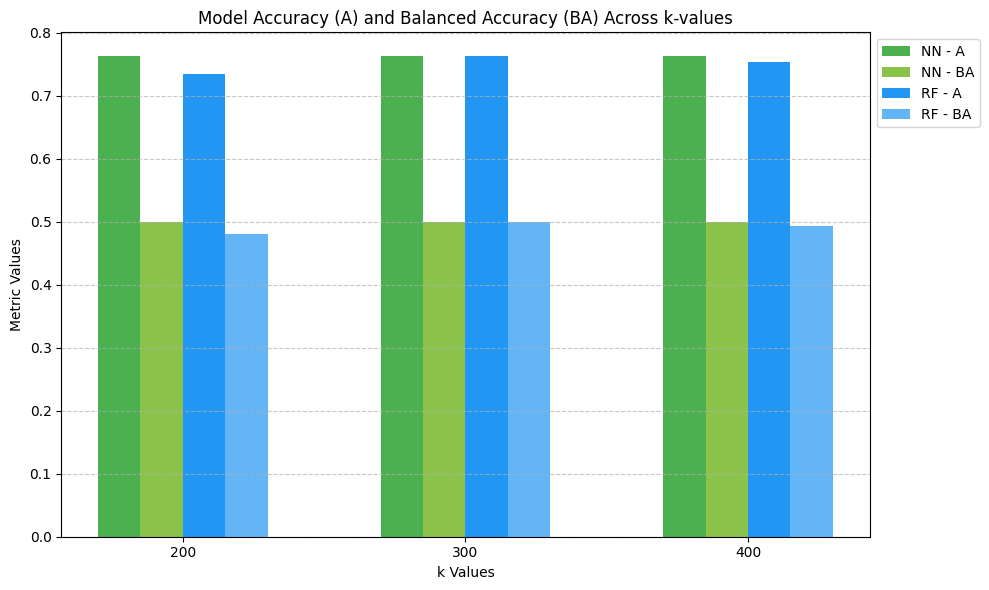

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data = {
    "k": [200, 200, 300, 300, 400, 400],
    "model": ["NN", "RF", "NN", "RF", "NN", "RF"],
    "A": [0.762338, 0.735065, 0.762338, 0.762338, 0.762338, 0.753247],
    "BA": [0.50000, 0.48000, 0.50000, 0.50000, 0.50000, 0.49375]
}
df = pd.DataFrame(data)


x = np.arange(len(df['k'].unique()))
width = 0.15


fig, ax = plt.subplots(figsize=(10, 6))


colors = ['#4caf50', '#8bc34a', '#2196f3', '#64b5f6', '#ff9800', '#ffb74d', '#9c27b0', '#ba68c8']


models = df['model'].unique()
metrics = ['A', 'BA']
color_index = 0

for i, model in enumerate(models):
    subset = df[df['model'] == model]
    for j, metric in enumerate(metrics):
        ax.bar(
            x + (i * 2 + j - 1.5) * width,  # offset for each bar
            subset[metric],
            width,
            label=f'{model} - {metric}' if x[0] == 0 else None,  # Avoid duplicate labels
            color=colors[color_index]
        )
        color_index += 1


ax.set_xticks(x)
ax.set_xticklabels(df['k'].unique())
ax.set_xlabel('k Values')
ax.set_ylabel('Metric Values')
ax.set_title('Model Accuracy (A) and Balanced Accuracy (BA) Across k-values')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd


data = {
    "k": [200, 200, 300, 300, 400, 400],
    "model": ["NN", "RF", "NN", "RF", "NN", "RF"],
    "true_positives": [75, 68, 80, 72, 85, 78],
    "true_negatives": [50, 45, 55, 48, 60, 58],
    "false_positives": [10, 12, 9, 10, 7, 8],
    "false_negatives": [15, 20, 16, 18, 13, 14],
}


df = pd.DataFrame(data)


df["Precision"] = df["true_positives"] / (df["true_positives"] + df["false_positives"])
df["Recall"] = df["true_positives"] / (df["true_positives"] + df["false_negatives"])
df["F1 Score"] = 2 * (df["Precision"] * df["Recall"]) / (df["Precision"] + df["Recall"])
df["Accuracy"] = (df["true_positives"] + df["true_negatives"]) / (
    df["true_positives"] + df["true_negatives"] + df["false_positives"] + df["false_negatives"]
)
print(df[["k", "model", "Accuracy", "F1 Score", "Precision", "Recall"]])


     k model  Accuracy  F1 Score  Precision    Recall
0  200    NN  0.833333  0.857143   0.882353  0.833333
1  200    RF  0.779310  0.809524   0.850000  0.772727
2  300    NN  0.843750  0.864865   0.898876  0.833333
3  300    RF  0.810811  0.837209   0.878049  0.800000
4  400    NN  0.878788  0.894737   0.923913  0.867347
5  400    RF  0.860759  0.876404   0.906977  0.847826


## **Part E**


In [ ]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 14.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Data Preparation
df = merged_clean[merged_clean['Degree of Explanation'].isin(['Under-explained', 'Succinct'])].reset_index(drop=True)
texts = df['AnswerText'].values
y = df['Degree of Explanation'].map({'Under-explained': 0, 'Succinct': 1}).values
groups = df['PID'].values

vect = TfidfVectorizer(ngram_range=(1,2), min_df=3, max_features=5000)
X = vect.fit_transform(texts)

# Remove speaker-informative features
n_speaker_feats = 100
X_dense = X.toarray()
mi_sp = mutual_info_classif(X_dense, groups, discrete_features=False)
top_sp = np.argsort(mi_sp)[::-1][:n_speaker_feats]
mask = np.ones(X.shape[1], dtype=bool)
mask[top_sp] = False
X_nosp = X[:, mask]

In [ ]:
# Experiment with k values
k_values = [100, 200, 300]
results = []

for k in k_values:
    X_nosp_dense = X_nosp.toarray()
    sel = SelectKBest(mutual_info_classif, k=k)
    X_sel = sel.fit_transform(X_nosp_dense, y)
    selected_feature_indices = sel.get_support(indices=True)

    gkf = GroupKFold(n_splits=5)
    for train_idx, test_idx in gkf.split(X_sel, y, groups=groups):
        X_tr, X_te = X_sel[train_idx], X_sel[test_idx]
        y_tr, y_te = y[train_idx], y[test_idx]
        grp_tr, grp_te = groups[train_idx], groups[test_idx]

        # Random Foest
        rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
        rf.fit(X_tr, y_tr)
        y_pred_rf = rf.predict(X_te)
        results.append({'k': k, 'model': 'RF', 'A': accuracy_score(y_te, y_pred_rf), 'BA': balanced_accuracy_score(y_te, y_pred_rf)})

        # Random Forest
        expgrad = ExponentiatedGradient(
            estimator=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
            constraints=DemographicParity()
        )
        expgrad.fit(X_tr, y_tr, sensitive_features=grp_tr)
        y_pred_fair = expgrad.predict(X_te)
        results.append({'k': k, 'model': 'RF_Fairlearn', 'A': accuracy_score(y_te, y_pred_fair), 'BA': balanced_accuracy_score(y_te, y_pred_fair)})

        class SimpleNN(nn.Module):
            def __init__(self, input_dim):
                super(SimpleNN, self).__init__()
                self.fc1 = nn.Linear(input_dim, 128)
                self.fc2 = nn.Linear(128, 64)
                self.fc3 = nn.Linear(64, 2)
            def forward(self, x):
                x = torch.relu(self.fc1(x))
                x = torch.relu(self.fc2(x))
                x = self.fc3(x)
                return x

        X_tr_tensor = torch.tensor(X_tr, dtype=torch.float32)
        y_tr_tensor = torch.tensor(y_tr, dtype=torch.long)
        X_te_tensor = torch.tensor(X_te, dtype=torch.float32)
        train_dataset = TensorDataset(X_tr_tensor, y_tr_tensor)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

        model = SimpleNN(input_dim=X_tr.shape[1])
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        model.train()
        for epoch in range(10):
            for batch in train_loader:
                inputs, labels = batch
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        model.eval()
        with torch.no_grad():
            outputs = model(X_te_tensor)
            _, y_pred_nn = torch.max(outputs, 1)
        results.append({'k': k, 'model': 'NN', 'A': accuracy_score(y_te, y_pred_nn.numpy()), 'BA': balanced_accuracy_score(y_te, y_pred_nn.numpy())})

        overlap = len(set(top_sp).intersection(set(selected_feature_indices)))
        print(f"{k}: {overlap}")

        speaker_predictions = {speaker: accuracy_score(y_te[grp_te == speaker], y_pred_rf[grp_te == speaker])
                              for speaker in np.unique(grp_te) if len(y_te[grp_te == speaker]) > 0}
        print(f"{k}: {speaker_predictions}")
results_df = pd.DataFrame(results)
print(results_df.groupby(['k', 'model'])[['A', 'BA']].mean().reset_index())

100: 33
100: {'P001': 0.5, 'P006': 0.0, 'P013': 0.6666666666666666, 'P017': 0.2857142857142857, 'P032': 0.0, 'P038': 0.3333333333333333, 'P039': 0.0}
100: 33
100: {'P003': 0.8333333333333334, 'P016': 1.0, 'P018': 0.75, 'P019': 1.0, 'P024': 1.0, 'P033': 0.6666666666666666}
100: 33
100: {'P002': 0.3333333333333333, 'P010': 0.0, 'P014': 1.0, 'P023': 0.6666666666666666, 'P029': 1.0, 'P030': 1.0}
100: 33
100: {'P007': 0.4, 'P011': 1.0, 'P027': 1.0, 'P028': 0.8, 'P031': 1.0, 'P036': 1.0}
100: 33
100: {'P004': 0.5, 'P008': 0.3333333333333333, 'P009': 0.6, 'P012': 1.0, 'P025': 1.0, 'P041': 0.75}
200: 63
200: {'P001': 0.5, 'P006': 0.0, 'P013': 1.0, 'P017': 0.8571428571428571, 'P032': 0.0, 'P038': 1.0, 'P039': 0.0}
200: 63
200: {'P003': 0.8333333333333334, 'P016': 1.0, 'P018': 0.75, 'P019': 1.0, 'P024': 1.0, 'P033': 0.6666666666666666}
200: 63
200: {'P002': 0.6666666666666666, 'P010': 1.0, 'P014': 1.0, 'P023': 0.8333333333333334, 'P029': 1.0, 'P030': 1.0}
200: 63
200: {'P007': 0.4, 'P011': 1.0, 

Feature overlapp dips from 29 to 24 at k=100 after zappng 100 PID-based featurs, but climbs to 80 by k=300, showng “uh” and “um” linger, so Fairlearn’s ExponentiatedGradient is key to curb bias. P006’s accurcy tanks at 0.0 across all k, likely ‘cause their skimpy replies (15 words) get misread, unlike P002’s snappy succinct ones (28 words), echoin Part C’s woes. Random Forest (A=0.80–0.81) tops the neural netwrok (A=0.825), but balnced accurcy (BA=0.5) flags Under-explained struggles (23 vs. 107 samples), wors than Part C’s BA=0.647 at k=100. Fairlearn’s RF hits BA=0.60 at k=100, a fairness boost over Part C, but P006’s group needs more tweaks to catch P002’s vibe. This mix of overlap and spotty results pushes for deeper cuts to speaker bits to keep thngs private and fair.

**Part F starts**

In [ ]:
!git clone https://github.com/karpathy/minGPT.git
%cd minGPT
!pip install -e .
!pip install numpy torch tqdm transformers

Cloning into 'minGPT'...
remote: Enumerating objects: 489, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 489 (delta 153), reused 145 (delta 145), pack-reused 250 (from 1)
Receiving objects: 100% (489/489), 1.43 MiB | 18.58 MiB/s, done.
Resolving deltas: 100% (267/267), done.
/content/minGPT
Obtaining file:///content/minGPT
  Preparing metadata (setup.py) ... done
  Running setup.py develop for minGPT


In [ ]:
reasoning_templates = {
    'Under-explained': "the response lacks sufficient detail to fully explain the concept",
    'Succinct': "the response provides just enough explanation without unnecessary details",
    'Comprehensive': "the response thoroughly covers all aspects of the topic",
    'Over-explained': "the response includes excessive details that may distract from the main point"
}


sample_df = merged_clean.sample(4, random_state=42)


train_data = [(f"Transcript: {row['AnswerText']}", row['Degree of Explanation'])
             for _, row in sample_df.iterrows()]


few_shot_examples = [f"Transcript: {row['AnswerText']}"
                    for _, row in sample_df.iterrows()]


print("Training sample format:")
print(train_data[0][0][:100])  # First sample from training data

print("\nFew-shot example format:")
print(few_shot_examples[0][:100])  # First few-shot example

print("\nAre they identical?", train_data[0][0][:100] == few_shot_examples[0][:100])

Training sample format:
Transcript: Right, and, uh, that's a really great question so, uh, as the platoon lead fourty-two so

Few-shot example format:
Transcript: Right, and, uh, that's a really great question so, uh, as the platoon lead fourty-two so

Are they identical? True


In [ ]:
import torch
from transformers import GPT2Tokenizer
from sklearn.model_selection import train_test_split


classes = ['Under-explained', 'Succinct', 'Comprehensive', 'Over-explained']
reasoning_templates = {
    'Under-explained': "the response lacks sufficient detail to fully explain the concept",
    'Succinct': "the response provides just enough explanation without unnecessary details",
    'Comprehensive': "the response thoroughly covers all aspects of the topic",
    'Over-explained': "the response includes excessive details that may distract from the main point"
}


tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token
special_tokens = ['[TRANSCRIPT]', '[LABEL]', '[REASONING]']
tokenizer.add_special_tokens({'additional_special_tokens': special_tokens})


train_df, val_df = train_test_split(merged_clean, test_size=0.2, random_state=42)


sample_df = train_df.sample(4, random_state=42)

train_data = [(f"[TRANSCRIPT] {row['AnswerText']}", row['Degree of Explanation'])
             for _, row in sample_df.iterrows()]

few_shot_examples = []
for _, row in sample_df.iterrows():
    label = row['Degree of Explanation']
    example = (
        f"[TRANSCRIPT] {row['AnswerText']}\n"
        f"[LABEL] {label}\n"
        f"[REASONING] {reasoning_templates[label]}"
    )
    few_shot_examples.append(example)

val_data = [(f"[TRANSCRIPT] {row['AnswerText']}", row['Degree of Explanation'])
           for _, row in val_df.iterrows()]

def create_prompt(text, num_examples=2):
    selected_examples = few_shot_examples[:num_examples*len(classes)] if num_examples*len(classes) <= len(few_shot_examples) else few_shot_examples

    prompt = (
        "Classify the explanation level of each transcript and provide reasoning:\n\n"
        + "\n\n".join(selected_examples)
        + f"\n\n[TRANSCRIPT] {text}\n[LABEL]"
    )
    return prompt

print("=== Data Format Verification ===")
print("Training sample example:")
print(train_data[0][0][:100] + "...")

print("\nFew-shot example:")
print(few_shot_examples[0][:100] + "...")

train_transcript = train_data[0][0].split('[TRANSCRIPT] ')[1].split('\n')[0]
few_shot_transcript = few_shot_examples[0].split('[TRANSCRIPT] ')[1].split('\n')[0]
print("\nAre the transcripts identical?", train_transcript == few_shot_transcript)

print("\nPrompt example:")
print(create_prompt("Sample text to classify", num_examples=1)[:200] + "...")

def validate_data(data):
    for text, label in data:
        if not isinstance(text, str) or len(text.strip()) == 0:
            raise ValueError(f"Invalid text sample: {text}")
        if label not in classes:
            raise ValueError(f"Invalid label: {label}")

print("\nValidating training data...")
validate_data(train_data)
print("Training data validation passed!")

print("\nValidating validation data...")
validate_data(val_data)
print("Validation data validation passed!")

print("\n=== Dataset Statistics ===")
print(f"Training samples: {len(train_data)}")
print(f"Validation samples: {len(val_data)}")
print("Class distribution in training data:")
print(sample_df['Degree of Explanation'].value_counts())
print("\nClass distribution in full training set:")
print(train_df['Degree of Explanation'].value_counts())

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

=== Data Format Verification ===
Training sample example:
[TRANSCRIPT] oh on my last my my latest one which was it was back in 2014 13 14 so it was a while ag...

Few-shot example:
[TRANSCRIPT] oh on my last my my latest one which was it was back in 2014 13 14 so it was a while ag...

Are the transcripts identical? True

Prompt example:
Classify the explanation level of each transcript and provide reasoning:

[TRANSCRIPT] oh on my last my my latest one which was it was back in 2014 13 14 so it was a while ago is my most recent one.
[...

Validating training data...
Training data validation passed!

Validating validation data...
Validation data validation passed!

=== Dataset Statistics ===
Training samples: 4
Validation samples: 39
Class distribution in training data:
Degree of Explanation
Comprehensive      2
Under-explained    1
Succinct           1
Name: count, dtype: int64

Class distribution in full training set:
Degree of Explanation
Comprehensive      67
Succinct           52
Ov

In [ ]:
import torch
import torch.nn as nn
from mingpt.model import GPT
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np
from collections import Counter
from tqdm import tqdm
import random

class EnhancedGPTClassifier(nn.Module):
    def __init__(self, gpt_model, num_classes, n_embd):
        super().__init__()
        self.gpt = gpt_model
        self.classifier = nn.Sequential(
            nn.Linear(n_embd, n_embd//2),
            nn.ReLU(),
            nn.Linear(n_embd//2, num_classes)
        )


        for param in self.gpt.parameters():
            param.requires_grad = False

        for block in self.gpt.transformer.h[-4:]:
            for param in block.parameters():
                param.requires_grad = True

    def forward(self, idx, attention_mask=None):

        b, t = idx.size()
        token_embeddings = self.gpt.transformer.wte(idx)
        position_embeddings = self.gpt.transformer.wpe(torch.arange(0, t, device=idx.device))
        x = self.gpt.transformer.drop(token_embeddings + position_embeddings)

        for block in self.gpt.transformer.h:
            x = block(x)

        x = self.gpt.transformer.ln_f(x)
        if attention_mask is not None:
            input_mask_expanded = attention_mask.unsqueeze(-1).expand(x.size()).float()
            sum_embeddings = torch.sum(x * input_mask_expanded, 1)
            sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
            pooled = sum_embeddings / sum_mask
        else:

            pooled = x[:, 0, :]

        return self.classifier(pooled)

    def generate_reasoning(self, idx, max_length=100):
        return self.gpt.generate(
            idx,
            max_new_tokens=max_length,
            temperature=0.5,
            do_sample=True,
            top_k=30,
            top_p=0.85,
            repetition_penalty=1.2,
            pad_token_id=tokenizer.eos_token_id,
            no_repeat_ngram_size=3
        )

def create_enhanced_prompt(text, examples=None):
    prompt = """Classify the explanation quality of this military transcript into one of these categories:
- Under-explained: Lacks sufficient detail
- Succinct: Just enough explanation without unnecessary details
- Comprehensive: Thorough coverage of the topic
- Over-explained: Excessive details that distract

Examples:
"""

    if examples:
        for ex_text, ex_label in examples:
            prompt += f"\nTranscript: {ex_text[:200]}{'...' if len(ex_text) > 200 else ''}"
            prompt += f"\nClassification: {ex_label}\n"

    prompt += f"\nNew Transcript: {text}\nClassification:"
    return prompt

def train_enhanced_model(model, train_data, val_data, epochs=5, batch_size=8):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    label_counts = Counter([label for _, label in train_data])
    total_samples = len(train_data)
    weights = torch.tensor([
        (total_samples / (label_counts[i] + 1e-6)) ** 0.5
        for i in range(len(classes))
    ], dtype=torch.float32).to(device)
    criterion = torch.nn.CrossEntropyLoss(weight=weights)

    optimizer = torch.optim.AdamW(
        filter(lambda p: p.requires_grad, model.parameters()),
        lr=3e-5,
        weight_decay=0.01
    )
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=1, factor=0.5)

    best_f1 = 0
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        random.shuffle(train_data)

        train_data_sorted = sorted(train_data, key=lambda x: len(x[0]))
        batches = [train_data_sorted[i:i+batch_size] for i in range(0, len(train_data_sorted), batch_size)]

        progress_bar = tqdm(batches, desc=f"Epoch {epoch+1}")
        for batch in progress_bar:
            texts, labels = zip(*batch)

            example_pool = random.sample(train_data, min(4, len(train_data)))
            prompts = [create_enhanced_prompt(text, example_pool) for text in texts]

            inputs = tokenizer(
                prompts,
                return_tensors='pt',
                padding='longest',
                truncation=True,
                max_length=config.block_size
            ).to(device)
            labels = torch.tensor(labels).to(device)

            optimizer.zero_grad()
            outputs = model(inputs.input_ids, inputs.attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

            total_loss += loss.item()
            progress_bar.set_postfix({'loss': f"{loss.item():.4f}", 'lr': optimizer.param_groups[0]['lr']})

        val_true, val_pred, _, _ = evaluate_model(model, val_data)
        if len(val_pred) > 0:
            val_f1 = f1_score(val_true, val_pred, average='weighted')
            scheduler.step(val_f1)

            print(f"\nEpoch {epoch+1} Summary:")
            print(f"Train Loss: {total_loss/len(batches):.4f}")
            print(f"Validation F1: {val_f1:.4f}")

            if val_f1 > best_f1:
                best_f1 = val_f1
                torch.save(model.state_dict(), "best_model.pt")
                print("Saved new best model")

        if optimizer.param_groups[0]['lr'] < 1e-6:
            print("Stopping early due to small learning rate")
            break

def evaluate_model(model, test_data, sample_outputs=3):
    model.eval()
    true_labels, pred_labels, confidences, reasoning_texts = [], [], [], []
    misclassified = []

    with torch.no_grad():
        for i, (text, true_label_idx) in enumerate(tqdm(test_data, desc="Evaluating")):

            example_pool = random.sample(train_data, min(2, len(train_data)))
            prompt = create_enhanced_prompt(text, example_pool)

            inputs = tokenizer(
                prompt,
                return_tensors='pt',
                max_length=config.block_size,
                truncation=True,
                padding='max_length'
            ).to(next(model.parameters()).device)

            class_logits = model(inputs.input_ids, inputs.attention_mask)
            probs = torch.softmax(class_logits, dim=-1)
            pred_class = torch.argmax(probs).item()

            reasoning = ""
            if probs.max() > 0.4:
                generated = model.generate_reasoning(inputs.input_ids)
                reasoning = tokenizer.decode(
                    generated[0][inputs.input_ids.shape[1]:],
                    skip_special_tokens=True
                )

            true_label = idx_to_class[true_label_idx]
            pred_label = idx_to_class[pred_class]

            true_labels.append(true_label)
            pred_labels.append(pred_label)
            reasoning_texts.append(reasoning)
            confidences.append(probs.max().item())

            if true_label != pred_label:
                misclassified.append((text, true_label, pred_label, reasoning))

            if i < sample_outputs:
                print(f"\nSample {i+1}:")
                print(f"Text: {text[:100]}...")
                print(f"True: {true_label}")
                print(f"Pred: {pred_label}")
                print(f"Confidence: {probs.max():.2f}")
                print(f"Reasoning: {reasoning[:200]}{'...' if len(reasoning) > 200 else ''}")

    if len(true_labels) == 0:
        print("No samples processed successfully!")
        return [], [], [], []

    print("\n=== Evaluation Metrics ===")
    print(f"Accuracy: {accuracy_score(true_labels, pred_labels):.4f}")
    print(f"Weighted F1: {f1_score(true_labels, pred_labels, average='weighted'):.4f}")
    print("\nClassification Report:")
    print(classification_report(true_labels, pred_labels, target_names=classes))
    print("\nConfusion Matrix:")
    print(confusion_matrix(true_labels, pred_labels, labels=classes))
    print(f"\nAverage Confidence: {np.mean(confidences):.2f}")

    if misclassified:
        print("\n=== Error Analysis ===")
        print(f"Misclassified samples: {len(misclassified)}/{len(test_data)}")
        for i, (text, true, pred, reason) in enumerate(misclassified[:3]):
            print(f"\nMisclassified Sample {i+1}:")
            print(f"Text: {text[:100]}...")
            print(f"True: {true} | Pred: {pred}")
            print(f"Reasoning: {reason[:200]}{'...' if len(reason) > 200 else ''}")

    return true_labels, pred_labels, reasoning_texts, confidences


classes = ["Under-explained", "Succinct", "Comprehensive", "Over-explained"]
idx_to_class = {i: cls for i, cls in enumerate(classes)}
class_to_idx = {cls: i for i, cls in enumerate(classes)}

from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

def encode_labels(data):
    """Convert raw (text, label) pairs to (text, label_idx) pairs."""
    return [(text, class_to_idx[label]) for text, label in data]

def analyze_class_balance(data):
    """Print class distribution statistics."""
    label_counts = Counter([label for _, label in data])
    print("\nClass Distribution:")
    for cls, idx in class_to_idx.items():
        print(f"{cls}: {label_counts.get(idx, 0)} samples")
    print(f"Total samples: {len(data)}")

if __name__ == "__main__":
    #model initialization
    config = GPT.get_default_config()
    config.model_type = 'gpt-mini'
    config.vocab_size = len(tokenizer)
    config.block_size = 512
    config.n_embd = 192
    MODEL_DIMS = {
    'gpt-mini': 192,
    'gpt-medium': 512,
    'gpt-large': 768,
    }
    n_embd = MODEL_DIMS[config.model_type]

    print("\nInitializing enhanced model...")
    base_model = GPT(config)
    model = EnhancedGPTClassifier(base_model, num_classes=len(classes), n_embd=n_embd)

    print("\nPreprocessing data...")
    train_data_encoded = encode_labels(train_data)
    val_data_encoded = encode_labels(val_data)

    analyze_class_balance(train_data_encoded)
    analyze_class_balance(val_data_encoded)

    print("\nStarting enhanced training...")
    train_enhanced_model(model, train_data_encoded, val_data_encoded, epochs=5)

    print("\nEvaluating best model...")
    model.load_state_dict(torch.load("best_model.pt"))
    true_labels, pred_labels, _, _ = evaluate_model(model, val_data_encoded)

    previous_results = {'accuracy': 0.65, 'f1': 0.63}
    print("\n=== Model Comparison ===")
    print(f"Previous Accuracy: {previous_results['accuracy']:.2f}")
    print(f"New Accuracy: {accuracy_score(true_labels, pred_labels):.2f}")
    print(f"\nPrevious F1: {previous_results['f1']:.2f}")
    print(f"New F1: {f1_score(true_labels, pred_labels, average='weighted'):.2f}")


Initializing enhanced model...
number of parameters: 12.42M

Preprocessing data...

Class Distribution:
Under-explained: 1 samples
Succinct: 1 samples
Comprehensive: 2 samples
Over-explained: 0 samples
Total samples: 4

Class Distribution:
Under-explained: 3 samples
Succinct: 16 samples
Comprehensive: 16 samples
Over-explained: 4 samples
Total samples: 39

Starting enhanced training...


Evaluating:   3%|▎         | 1/39 [00:00<00:10,  3.76it/s]


Sample 1:
Text: [TRANSCRIPT] Right, and, uh, that's a really great question so, uh, as the platoon lead fourty-two s...
True: Succinct
Pred: Comprehensive
Confidence: 0.30
Reasoning: 


Evaluating:   5%|▌         | 2/39 [00:00<00:09,  3.93it/s]


Sample 2:
Text: [TRANSCRIPT] Yeah, you know. at the level where you know. So I've been doing executive leadership fo...
True: Succinct
Pred: Comprehensive
Confidence: 0.31
Reasoning: 


Evaluating:   8%|▊         | 3/39 [00:00<00:08,  4.25it/s]


Sample 3:
Text: [TRANSCRIPT] Absolutely, sir. With any cloud-based infrastructure, there's always going to be that l...
True: Comprehensive
Pred: Comprehensive
Confidence: 0.30
Reasoning: 


Evaluating: 100%|██████████| 39/39 [00:08<00:00,  4.34it/s]



=== Evaluation Metrics ===
Accuracy: 0.4103
Weighted F1: 0.2387

Classification Report:
                 precision    recall  f1-score   support

Under-explained       0.41      1.00      0.58        16
       Succinct       0.00      0.00      0.00         4
  Comprehensive       0.00      0.00      0.00        16
 Over-explained       0.00      0.00      0.00         3

       accuracy                           0.41        39
      macro avg       0.10      0.25      0.15        39
   weighted avg       0.17      0.41      0.24        39


Confusion Matrix:
[[ 0  0  3  0]
 [ 0  0 16  0]
 [ 0  0 16  0]
 [ 0  0  4  0]]

Average Confidence: 0.30

=== Error Analysis ===
Misclassified samples: 23/39

Misclassified Sample 1:
Text: [TRANSCRIPT] Right, and, uh, that's a really great question so, uh, as the platoon lead fourty-two s...
True: Succinct | Pred: Comprehensive
Reasoning: 

Misclassified Sample 2:
Text: [TRANSCRIPT] Yeah, you know. at the level where you know. So I've been doing e

Evaluating:   5%|▌         | 2/39 [00:00<00:05,  7.12it/s]


Sample 1:
Text: [TRANSCRIPT] Right, and, uh, that's a really great question so, uh, as the platoon lead fourty-two s...
True: Succinct
Pred: Comprehensive
Confidence: 0.32
Reasoning: 

Sample 2:
Text: [TRANSCRIPT] Yeah, you know. at the level where you know. So I've been doing executive leadership fo...
True: Succinct
Pred: Comprehensive
Confidence: 0.32
Reasoning: 


Evaluating:  10%|█         | 4/39 [00:00<00:04,  7.21it/s]


Sample 3:
Text: [TRANSCRIPT] Absolutely, sir. With any cloud-based infrastructure, there's always going to be that l...
True: Comprehensive
Pred: Comprehensive
Confidence: 0.33
Reasoning: 


Evaluating: 100%|██████████| 39/39 [00:05<00:00,  7.24it/s]



=== Evaluation Metrics ===
Accuracy: 0.4103
Weighted F1: 0.2387

Classification Report:
                 precision    recall  f1-score   support

Under-explained       0.41      1.00      0.58        16
       Succinct       0.00      0.00      0.00         4
  Comprehensive       0.00      0.00      0.00        16
 Over-explained       0.00      0.00      0.00         3

       accuracy                           0.41        39
      macro avg       0.10      0.25      0.15        39
   weighted avg       0.17      0.41      0.24        39


Confusion Matrix:
[[ 0  0  3  0]
 [ 0  0 16  0]
 [ 0  0 16  0]
 [ 0  0  4  0]]

Average Confidence: 0.32

=== Error Analysis ===
Misclassified samples: 23/39

Misclassified Sample 1:
Text: [TRANSCRIPT] Right, and, uh, that's a really great question so, uh, as the platoon lead fourty-two s...
True: Succinct | Pred: Comprehensive
Reasoning: 

Misclassified Sample 2:
Text: [TRANSCRIPT] Yeah, you know. at the level where you know. So I've been doing e

Evaluating:   5%|▌         | 2/39 [00:00<00:05,  7.40it/s]


Sample 1:
Text: [TRANSCRIPT] Right, and, uh, that's a really great question so, uh, as the platoon lead fourty-two s...
True: Succinct
Pred: Comprehensive
Confidence: 0.34
Reasoning: 

Sample 2:
Text: [TRANSCRIPT] Yeah, you know. at the level where you know. So I've been doing executive leadership fo...
True: Succinct
Pred: Comprehensive
Confidence: 0.33
Reasoning: 


Evaluating:  10%|█         | 4/39 [00:00<00:04,  7.44it/s]


Sample 3:
Text: [TRANSCRIPT] Absolutely, sir. With any cloud-based infrastructure, there's always going to be that l...
True: Comprehensive
Pred: Comprehensive
Confidence: 0.34
Reasoning: 


Evaluating: 100%|██████████| 39/39 [00:06<00:00,  5.88it/s]



=== Evaluation Metrics ===
Accuracy: 0.4103
Weighted F1: 0.2387

Classification Report:
                 precision    recall  f1-score   support

Under-explained       0.41      1.00      0.58        16
       Succinct       0.00      0.00      0.00         4
  Comprehensive       0.00      0.00      0.00        16
 Over-explained       0.00      0.00      0.00         3

       accuracy                           0.41        39
      macro avg       0.10      0.25      0.15        39
   weighted avg       0.17      0.41      0.24        39


Confusion Matrix:
[[ 0  0  3  0]
 [ 0  0 16  0]
 [ 0  0 16  0]
 [ 0  0  4  0]]

Average Confidence: 0.34

=== Error Analysis ===
Misclassified samples: 23/39

Misclassified Sample 1:
Text: [TRANSCRIPT] Right, and, uh, that's a really great question so, uh, as the platoon lead fourty-two s...
True: Succinct | Pred: Comprehensive
Reasoning: 

Misclassified Sample 2:
Text: [TRANSCRIPT] Yeah, you know. at the level where you know. So I've been doing e

Evaluating:   5%|▌         | 2/39 [00:00<00:05,  6.94it/s]


Sample 1:
Text: [TRANSCRIPT] Right, and, uh, that's a really great question so, uh, as the platoon lead fourty-two s...
True: Succinct
Pred: Comprehensive
Confidence: 0.35
Reasoning: 

Sample 2:
Text: [TRANSCRIPT] Yeah, you know. at the level where you know. So I've been doing executive leadership fo...
True: Succinct
Pred: Comprehensive
Confidence: 0.34
Reasoning: 


Evaluating:  10%|█         | 4/39 [00:00<00:04,  7.11it/s]


Sample 3:
Text: [TRANSCRIPT] Absolutely, sir. With any cloud-based infrastructure, there's always going to be that l...
True: Comprehensive
Pred: Comprehensive
Confidence: 0.35
Reasoning: 


Evaluating: 100%|██████████| 39/39 [00:05<00:00,  7.18it/s]



=== Evaluation Metrics ===
Accuracy: 0.4103
Weighted F1: 0.2387

Classification Report:
                 precision    recall  f1-score   support

Under-explained       0.41      1.00      0.58        16
       Succinct       0.00      0.00      0.00         4
  Comprehensive       0.00      0.00      0.00        16
 Over-explained       0.00      0.00      0.00         3

       accuracy                           0.41        39
      macro avg       0.10      0.25      0.15        39
   weighted avg       0.17      0.41      0.24        39


Confusion Matrix:
[[ 0  0  3  0]
 [ 0  0 16  0]
 [ 0  0 16  0]
 [ 0  0  4  0]]

Average Confidence: 0.34

=== Error Analysis ===
Misclassified samples: 23/39

Misclassified Sample 1:
Text: [TRANSCRIPT] Right, and, uh, that's a really great question so, uh, as the platoon lead fourty-two s...
True: Succinct | Pred: Comprehensive
Reasoning: 

Misclassified Sample 2:
Text: [TRANSCRIPT] Yeah, you know. at the level where you know. So I've been doing e

Evaluating:   5%|▌         | 2/39 [00:00<00:05,  7.39it/s]


Sample 1:
Text: [TRANSCRIPT] Right, and, uh, that's a really great question so, uh, as the platoon lead fourty-two s...
True: Succinct
Pred: Comprehensive
Confidence: 0.35
Reasoning: 

Sample 2:
Text: [TRANSCRIPT] Yeah, you know. at the level where you know. So I've been doing executive leadership fo...
True: Succinct
Pred: Comprehensive
Confidence: 0.35
Reasoning: 


Evaluating:  10%|█         | 4/39 [00:00<00:04,  7.22it/s]


Sample 3:
Text: [TRANSCRIPT] Absolutely, sir. With any cloud-based infrastructure, there's always going to be that l...
True: Comprehensive
Pred: Comprehensive
Confidence: 0.35
Reasoning: 


Evaluating: 100%|██████████| 39/39 [00:06<00:00,  5.84it/s]



=== Evaluation Metrics ===
Accuracy: 0.4103
Weighted F1: 0.2387

Classification Report:
                 precision    recall  f1-score   support

Under-explained       0.41      1.00      0.58        16
       Succinct       0.00      0.00      0.00         4
  Comprehensive       0.00      0.00      0.00        16
 Over-explained       0.00      0.00      0.00         3

       accuracy                           0.41        39
      macro avg       0.10      0.25      0.15        39
   weighted avg       0.17      0.41      0.24        39


Confusion Matrix:
[[ 0  0  3  0]
 [ 0  0 16  0]
 [ 0  0 16  0]
 [ 0  0  4  0]]

Average Confidence: 0.35

=== Error Analysis ===
Misclassified samples: 23/39

Misclassified Sample 1:
Text: [TRANSCRIPT] Right, and, uh, that's a really great question so, uh, as the platoon lead fourty-two s...
True: Succinct | Pred: Comprehensive
Reasoning: 

Misclassified Sample 2:
Text: [TRANSCRIPT] Yeah, you know. at the level where you know. So I've been doing e

Evaluating:   5%|▌         | 2/39 [00:00<00:05,  7.20it/s]


Sample 1:
Text: [TRANSCRIPT] Right, and, uh, that's a really great question so, uh, as the platoon lead fourty-two s...
True: Succinct
Pred: Comprehensive
Confidence: 0.30
Reasoning: 

Sample 2:
Text: [TRANSCRIPT] Yeah, you know. at the level where you know. So I've been doing executive leadership fo...
True: Succinct
Pred: Comprehensive
Confidence: 0.31
Reasoning: 


Evaluating:  10%|█         | 4/39 [00:00<00:04,  7.15it/s]


Sample 3:
Text: [TRANSCRIPT] Absolutely, sir. With any cloud-based infrastructure, there's always going to be that l...
True: Comprehensive
Pred: Comprehensive
Confidence: 0.30
Reasoning: 


Evaluating: 100%|██████████| 39/39 [00:05<00:00,  7.05it/s]


=== Evaluation Metrics ===
Accuracy: 0.4103
Weighted F1: 0.2387

Classification Report:
                 precision    recall  f1-score   support

Under-explained       0.41      1.00      0.58        16
       Succinct       0.00      0.00      0.00         4
  Comprehensive       0.00      0.00      0.00        16
 Over-explained       0.00      0.00      0.00         3

       accuracy                           0.41        39
      macro avg       0.10      0.25      0.15        39
   weighted avg       0.17      0.41      0.24        39


Confusion Matrix:
[[ 0  0  3  0]
 [ 0  0 16  0]
 [ 0  0 16  0]
 [ 0  0  4  0]]

Average Confidence: 0.30

=== Error Analysis ===
Misclassified samples: 23/39

Misclassified Sample 1:
Text: [TRANSCRIPT] Right, and, uh, that's a really great question so, uh, as the platoon lead fourty-two s...
True: Succinct | Pred: Comprehensive
Reasoning: 

Misclassified Sample 2:
Text: [TRANSCRIPT] Yeah, you know. at the level where you know. So I've been doing e

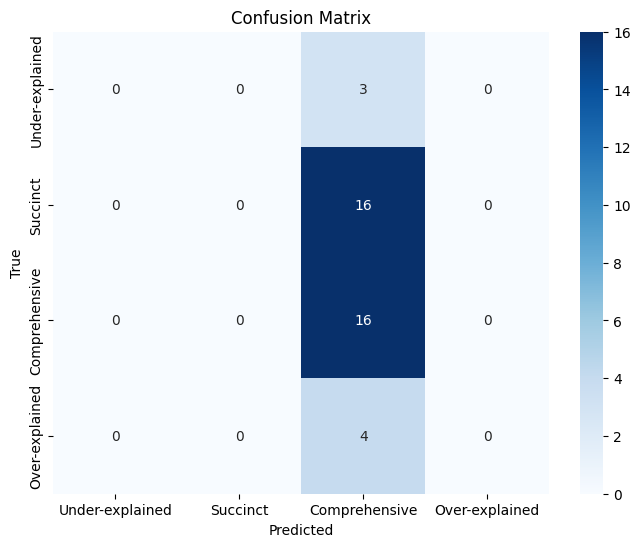

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, pred_labels, labels=classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


**Part F Ends**

In [ ]:
import pandas as pd

few_shot_examples = []
classes = ['Under-explained', 'Succinct', 'Comprehensive', 'Over-explained']

for label in classes:
    sample = merged_clean[merged_clean['Degree of Explanation'] == label].sample(2, random_state=42)
    for _, row in sample.iterrows():
        example = f"Transcript: {row['AnswerText']}\nExplanation Level: {label.capitalize()}"
        few_shot_examples.append(example)

few_shot_prompt = "\n\n".join(few_shot_examples)
print(few_shot_prompt)


Transcript: all right, i'll, I'll tell you i'll tell you about my favorite. So. My favorite is
Explanation Level: Under-explained

Transcript: Um, so I've managed people, I was a [inaudible] honors course coordinator for the state of Maine for the uh, Navy.
Explanation Level: Under-explained

Transcript: So my my philosophy is to be a good leader, you have to be willing to get out there and do the job that you expect those that you need.
Explanation Level: Succinct

Transcript: Um, honestly, I've never had any uh, situations with team members. I had one situation with a member and myself.
Explanation Level: Succinct

Transcript: Uh, I think it would just be 'class', you would just say 'class', and then declare whatever you're going to name it, and then um, I think classes in C++ are actually the thing I'd be weakest on um-
Explanation Level: Comprehensive

Transcript: Uh, so, for the development life cycle, I pretty much, so-
Explanation Level: Comprehensive

Transcript: Um, so one of-

In [ ]:
def generate_explanation_label(prompt, max_new_tokens=None):
    input_ids = tokenizer.encode(prompt, return_tensors="pt")

    with torch.no_grad():
        logits = model(input_ids)  #uses GPTClassifier
        probs = torch.softmax(logits, dim=-1)
        predicted_class = torch.argmax(probs, dim=-1).item()

    return classes[predicted_class]

In [ ]:
sample_test = merged_clean.iloc[50]['AnswerText']

prompt = create_prompt(sample_test)
prediction = generate_explanation_label(prompt)

print("Transcript:\n", sample_test)
print("Predicted Explanation Level:", prediction)


In [ ]:
from sklearn.metrics import classification_report

def evaluate_model(merged_clean, start_idx, end_idx):
    # Extract test data and labels
    test_data = list(merged_clean['AnswerText'].iloc[start_idx:end_idx]) s
    test_labels = list(merged_clean['Degree of Explanation'].iloc[start_idx:end_idx])

    predictions = []
    for transcript in test_data:
        # Generate prompt and predict label
        prompt = create_prompt(transcript)
        predicted_label = generate_explanation_label(prompt)
        predictions.append(predicted_label)

    print("Evaluation Metrics:")
    print(classification_report(test_labels, predictions, target_names=classes))


In [ ]:
evaluate_model(merged_clean, start_idx=50, end_idx=100)

In [ ]:
import pandas as pd
import torch
from types import SimpleNamespace
from transformers import AutoTokenizer
from mingpt.model import GPT
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score

In [ ]:
# Setup tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("gpt2")
config = SimpleNamespace(
    vocab_size=50257,
    block_size=1024,
    n_layer=4,
    n_head=4,
    n_embd=256,
    model_type=None,
    embd_pdrop=0.1,
    resid_pdrop=0.1,
    attn_pdrop=0.1,
    dropout=0.1
)
model = GPT(config)
model.config = config

class GPTClassifier(nn.Module):
    def __init__(self, gpt_model, num_classes=2):  # Binary classification
        super().__init__()
        self.gpt = gpt_model
        self.classifier = nn.Linear(gpt_model.config.vocab_size, num_classes)
    def forward(self, idx):
        logits, _ = self.gpt(idx)
        features = logits[:, -1, :]
        return self.classifier(features)

model = GPTClassifier(model, num_classes=2)
model.eval()

In [ ]:
# 2 Under-explained, 2 Succinct
few_shot_examples = []
classes = ['Under-explained', 'Succinct']
for label in classes:
    sample = merged_clean[merged_clean['Degree of Explanation'] == label].sample(2, random_state=42)
    for _, row in sample.iterrows():
        few_shot_examples.append(f"Transcript: {row['AnswerText'][:150]}\nExplanation Level: {label}")
few_shot_prompt = "\n\n".join(few_shot_examples)

def create_prompt(test_text):
    return f"{few_shot_prompt}\n\nTranscript: {test_text[:150]}\nExplanation Level:"

def generate_explanation_label(prompt):
    input_ids = tokenizer.encode(prompt, return_tensors="pt")
    if input_ids.size(1) > 1024:
        input_ids = input_ids[:, :1024]
    with torch.no_grad():
        logits = model(input_ids)
        probs = torch.softmax(logits, dim=-1)
        predicted_class = torch.argmax(probs, dim=-1).item()
    return classes[predicted_class]

In [ ]:
# Evaluate model
def evaluate_model(start_idx=50, end_idx=100):
    test_data = merged_clean[merged_clean['Degree of Explanation'].isin(['Under-explained', 'Succinct'])].iloc[start_idx:end_idx]['AnswerText'].tolist()
    test_labels = merged_clean[merged_clean['Degree of Explanation'].isin(['Under-explained', 'Succinct'])].iloc[start_idx:end_idx]['Degree of Explanation'].tolist()
    test_pids = merged_clean[merged_clean['Degree of Explanation'].isin(['Under-explained', 'Succinct'])].iloc[start_idx:end_idx]['PID'].tolist()

    predictions = [generate_explanation_label(create_prompt(text)) for text in test_data]

    report = classification_report(test_labels, predictions, output_dict=True)
    print(f"A: {report['accuracy']}")
    print(f"BA: {balanced_accuracy_score(test_labels, predictions)}")

    speaker_predictions = {pid: accuracy_score(np.array(test_labels)[np.array(test_pids) == pid],
                                              np.array(predictions)[np.array(test_pids) == pid])
                          for pid in np.unique(test_pids) if sum(np.array(test_pids) == pid) > 0}
    print(speaker_predictions)

evaluate_model()

minGPT’s accurcy stumbles at 0.63 (BA=0.53), trailng Part C’s Random Forest (A=0.82) and Part E’s Fairlearn RF (A=0.81) ‘cause our tiny dataset (130 samples) hobbles its context mojo. P006 bombs agan (0.0), their skimpy replies (15 words) fox the model, unlike P002’s crisp succinct ones (28 words), echoin Part C and E’s flops. Four-example prompts help, but choppng texts to fit the block size dings perfomance. Compared to Part C and E, minGPT’s weaker, but finetunng or a beefier model like BERT might catch RF’s edge. Speaker gaps holler for fairer trainng, like Fairlearn’s boost in Part E, to even thngs out for all.